In [2]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
from shapely.geometry import Point, Polygon
import shapely.vectorized as sv
import numpy as np
from time import time
from math import radians, cos, sin, asin, sqrt

In [3]:
nasa_data_archive_new = gpd.read_file('DL_FIRE_M6_123693/fire_archive_M6_123693.shp')

In [4]:
nasa_data_archive_new

,LATITUDE,LONGITUDE,BRIGHTNESS,SCAN,TRACK,ACQ_DATE,ACQ_TIME,SATELLITE,INSTRUMENT,CONFIDENCE,VERSION,BRIGHT_T31,FRP,DAYNIGHT,TYPE,geometry
0,-11.7924,142.0850,319.3,1.0,1.0,2019-08-01,0056,Terra,MODIS,71,6.3,297.3,11.3,D,0,POINT (142.08500 -11.79240)
1,-11.8070,142.0583,313.0,1.0,1.0,2019-08-01,0056,Terra,MODIS,48,6.3,297.3,6.6,D,0,POINT (142.05830 -11.80700)
2,-12.4527,141.8162,328.6,1.0,1.0,2019-08-01,0057,Terra,MODIS,83,6.3,298.2,21.8,D,0,POINT (141.81620 -12.45270)
3,-12.5581,141.9071,318.2,1.0,1.0,2019-08-01,0057,Terra,MODIS,56,6.3,304.8,8.9,D,0,POINT (141.90710 -12.55810)
4,-13.1654,141.9715,317.2,1.0,1.0,2019-08-01,0057,Terra,MODIS,72,6.3,300.0,9.9,D,0,POINT (141.97150 -13.16540)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193252,-34.3477,150.3607,321.5,4.0,1.9,2019-12-31,2318,Terra,MODIS,74,6.3,292.2,110.6,D,0,POINT (150.36070 -34.34770)
193253,-34.8709,150.1268,311.2,4.0,1.9,2019-12-31,2318,Terra,MODIS,13,6.3,290.2,49.9,D,0,POINT (150.12680 -34.87090)
193254,-34.9367,149.9944,323.2,4.0,1.9,2019-12-31,2318,Terra,MODIS,76,6.3,290.8,133.5,D,0,POINT (149.99440 -34.93670)
193255,-34.8738,150.1182,311.8,4.0,1.9,2019-12-31,2318,Terra,MODIS,39,6.3,289.9,55.8,D,0,POINT (150.11820 -34.87380)


In [5]:
nasa_data_archive_new.dtypes

LATITUDE       float64
LONGITUDE      float64
BRIGHTNESS     float64
SCAN           float64
TRACK          float64
ACQ_DATE        object
ACQ_TIME        object
SATELLITE       object
INSTRUMENT      object
CONFIDENCE       int64
VERSION         object
BRIGHT_T31     float64
FRP            float64
DAYNIGHT        object
TYPE             int64
geometry      geometry
dtype: object

In [6]:
pd.to_datetime(nasa_data_archive_new['ACQ_DATE'])

0        2019-08-01
1        2019-08-01
2        2019-08-01
3        2019-08-01
4        2019-08-01
            ...    
193252   2019-12-31
193253   2019-12-31
193254   2019-12-31
193255   2019-12-31
193256   2019-12-31
Name: ACQ_DATE, Length: 193257, dtype: datetime64[ns]

In [7]:
nasa_data_archive_new['ACQ_DATE'].astype(str).str[:4].unique()

array(['2019'], dtype=object)

In [8]:
nasa_data_archive_2020 = gpd.read_file('E:\datasets_bushfire_flora_fauna/DL_FIRE_M6_123698/fire_nrt_M6_123698.shp')

In [9]:
nasa_data_archive_2020

,LATITUDE,LONGITUDE,BRIGHTNESS,SCAN,TRACK,ACQ_DATE,ACQ_TIME,SATELLITE,INSTRUMENT,CONFIDENCE,VERSION,BRIGHT_T31,FRP,DAYNIGHT,geometry
0,-16.004,145.118,331.8,1.2,1.1,2020-01-01,0050,Terra,MODIS,80,6.0NRT,302.9,28.2,D,POINT (145.11800 -16.00400)
1,-16.004,145.112,325.7,1.2,1.1,2020-01-01,0050,Terra,MODIS,71,6.0NRT,302.3,17.3,D,POINT (145.11200 -16.00400)
2,-16.006,145.123,323.4,1.2,1.1,2020-01-01,0050,Terra,MODIS,63,6.0NRT,303.2,14.3,D,POINT (145.12300 -16.00600)
3,-14.851,134.277,325.9,2.9,1.6,2020-01-01,0050,Terra,MODIS,72,6.0NRT,297.3,36.5,D,POINT (134.27700 -14.85100)
4,-18.438,145.281,338.1,1.3,1.1,2020-01-01,0050,Terra,MODIS,71,6.0NRT,309.2,34.9,D,POINT (145.28100 -18.43800)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47792,-14.402,127.732,307.8,1.1,1.1,2020-03-31,1645,Aqua,MODIS,73,6.0NRT,291.1,6.7,N,POINT (127.73200 -14.40200)
47793,-15.203,128.017,308.4,1.1,1.0,2020-03-31,1645,Aqua,MODIS,48,6.0NRT,278.5,8.5,N,POINT (128.01700 -15.20300)
47794,-17.859,125.699,314.5,1.3,1.1,2020-03-31,1645,Aqua,MODIS,86,6.0NRT,296.9,13.6,N,POINT (125.69900 -17.85900)
47795,-17.879,125.714,309.7,1.3,1.1,2020-03-31,1645,Aqua,MODIS,71,6.0NRT,297.4,8.2,N,POINT (125.71400 -17.87900)


In [19]:
qld_suburbs = gpd.read_file('qld_locality_polygon_shp/QLD_LOCALITY_POLYGON_shp.shp')

In [32]:
display(qld_suburbs.head())
print(len(qld_suburbs))

,LC_PLY_PID,DT_CREATE,DT_RETIRE,LOC_PID,QLD_LOCALI,QLD_LOCA_1,QLD_LOCA_2,QLD_LOCA_3,QLD_LOCA_4,QLD_LOCA_5,QLD_LOCA_6,QLD_LOCA_7,geometry
0,67839,2018-09-13,None,QLD1991,2016-08-10,None,MOUNT BERRYMAN,None,None,G,None,3,"POLYGON ((152.30132 -27.75523, 152.30122 -27.7..."
1,64808,2017-06-14,None,QLD2092,2017-08-10,None,MOUNTAIN CREEK,None,None,G,None,3,"POLYGON ((153.10559 -26.71514, 153.10323 -26.7..."
2,64939,2017-06-14,None,QLD1803,2017-08-10,None,MARCOOLA,None,None,G,None,3,"POLYGON ((153.09112 -26.61160, 153.09065 -26.6..."
3,67905,2018-09-13,None,QLD744,2018-05-09,None,COVERTY,None,None,G,None,3,"POLYGON ((151.44572 -26.33205, 151.44550 -26.3..."
4,63067,2016-06-29,None,QLD3331,2018-08-07,None,BOUNTIFUL ISLANDS,None,None,G,None,3,"POLYGON ((139.84126 -16.70989, 139.84113 -16.7..."


3299


In [28]:
nsw_suburbs = gpd.read_file('nsw_locality_polygon_shp/NSW_LOCALITY_POLYGON_shp.shp')

In [33]:
display(nsw_suburbs.head())
print(len(nsw_suburbs))

,LC_PLY_PID,DT_CREATE,DT_RETIRE,LOC_PID,NSW_LOCALI,NSW_LOCA_1,NSW_LOCA_2,NSW_LOCA_3,NSW_LOCA_4,NSW_LOCA_5,NSW_LOCA_6,NSW_LOCA_7,geometry
0,25065,2015-09-03,None,NSW2557,2015-11-10,None,MAYFIELD WEST,None,None,G,None,1,"POLYGON ((151.73345 -32.87974, 151.73286 -32.8..."
1,16193,2011-11-22,None,NSW4136,2012-02-04,None,WALLACETOWN,None,None,G,None,1,"POLYGON ((147.45092 -34.96519, 147.45639 -34.9..."
2,19660,2012-11-21,None,NSW4098,2013-01-23,None,UTUNGUN,None,None,G,None,1,"POLYGON ((152.80591 -30.71097, 152.81237 -30.7..."
3,25101,2015-09-03,None,NSW4391,2015-11-10,None,WOLLSTONECRAFT,None,None,G,None,1,"POLYGON ((151.19808 -33.82566, 151.19816 -33.8..."
4,19669,2012-11-21,None,NSW3304,2013-01-23,None,PUTNEY,None,None,G,None,1,"POLYGON ((151.10398 -33.81987, 151.10406 -33.8..."


4591


In [224]:
species_vic_also_mod_con = gpd.read_file('species_vic_also_mod_con.shp')

In [225]:
print(len(species_vic_also_mod_con))
display(species_vic_also_mod_con.head())

263


,index,OBJECTID,Shape_Leng,Shape_Area,listed_id,map_id,sci_name,comm_name,threatened,migratory,...,tax_order,tax_class,tax_phylum,tax_king,other_ids,cell_size,regions,attributio,sprat_prof,geometry
0,0,35,803.88,1340.4448,36,36,Balaenoptera musculus,Blue Whale,Endangered,Migratory,...,Cetacea,Mammalia,Chordata,Animalia,None,0.01,NT; CI; QLD; NSW; TAS; VIC; WA; ACI; CSI; SA; ...,Species 1km Grids August 2019 Canberra: Depart...,http://www.environment.gov.au/cgi-bin/sprat/pu...,"MULTIPOLYGON (((153.22000 -68.35000, 153.25000..."
1,1,36,396.02,373.2306,36,36,Balaenoptera musculus,Blue Whale,Endangered,Migratory,...,Cetacea,Mammalia,Chordata,Animalia,None,0.01,NT; CI; QLD; NSW; TAS; VIC; WA; ACI; CSI; SA; ...,Species 1km Grids August 2019 Canberra: Depart...,http://www.environment.gov.au/cgi-bin/sprat/pu...,"MULTIPOLYGON (((133.51000 -32.14000, 133.50000..."
2,2,43,400.30,265.6278,40,40,Eubalaena australis,Southern Right Whale,Endangered,None,...,Cetacea,Mammalia,Chordata,Animalia,75529,0.01,QLD; NSW; TAS; VIC; WA; CSI; SA; HMI; AAT; JBT...,Species 1km Grids August 2019 Canberra: Depart...,http://www.environment.gov.au/cgi-bin/sprat/pu...,"MULTIPOLYGON (((159.04000 -51.00000, 159.04000..."
3,3,44,696.52,964.8850,40,40,Eubalaena australis,Southern Right Whale,Endangered,None,...,Cetacea,Mammalia,Chordata,Animalia,75529,0.01,QLD; NSW; TAS; VIC; WA; CSI; SA; HMI; AAT; JBT...,Species 1km Grids August 2019 Canberra: Depart...,http://www.environment.gov.au/cgi-bin/sprat/pu...,"MULTIPOLYGON (((142.05000 -63.44000, 142.05000..."
4,4,84,8.06,0.6568,77,77,Pseudomys shortridgei,"Heath Mouse, Dayang, Heath Rat",Endangered,None,...,Rodentia,Mammalia,Chordata,Animalia,None,0.01,VIC; WA; SA,Species 1km Grids August 2019 Canberra: Depart...,http://www.environment.gov.au/cgi-bin/sprat/pu...,"MULTIPOLYGON (((141.16000 -37.39000, 141.16000..."


In [42]:
species_vic_also_mod_con.threatened.value_counts()

Vulnerable                130
Endangered                 91
Critically Endangered      37
Conservation Dependent      5
Name: threatened, dtype: int64

In [45]:
species_vic_also_mod_con.comm_name.value_counts()

Malleefowl                                   9
Hawksbill Turtle                             7
Leatherback Turtle, Leathery Turtle, Luth    7
Loggerhead Turtle                            7
Green Turtle                                 7
                                            ..
Regent Parrot (eastern)                      1
Greater Sand Plover, Large Sand Plover       1
Southern Bluefin Tuna                        1
Indian Yellow-nosed  Albatross               1
Great Knot                                   1
Name: comm_name, Length: 119, dtype: int64

In [48]:
species_vic_also_mod_con[species_vic_also_mod_con.comm_namte=='Malleefowl']

,index,OBJECTID,Shape_Leng,Shape_Area,listed_id,map_id,sci_name,comm_name,threatened,migratory,...,tax_order,tax_class,tax_phylum,tax_king,other_ids,cell_size,regions,attributio,sprat_prof,geometry
161,271,621,244.32,20.03950,934,934,Leipoa ocellata,Malleefowl,Vulnerable,None,...,Galliformes,Aves,Chordata,Animalia,None,0.01,NT; NSW; VIC; WA; SA,Species 1km Grids August 2019 Canberra: Depart...,http://www.environment.gov.au/cgi-bin/sprat/pu...,"MULTIPOLYGON (((125.55000 -30.48000, 125.55000..."
162,272,622,184.59,16.28085,934,934,Leipoa ocellata,Malleefowl,Vulnerable,None,...,Galliformes,Aves,Chordata,Animalia,None,0.01,NT; NSW; VIC; WA; SA,Species 1km Grids August 2019 Canberra: Depart...,http://www.environment.gov.au/cgi-bin/sprat/pu...,"MULTIPOLYGON (((136.13000 -30.81000, 136.10000..."
163,273,623,358.86,32.70960,934,934,Leipoa ocellata,Malleefowl,Vulnerable,None,...,Galliformes,Aves,Chordata,Animalia,None,0.01,NT; NSW; VIC; WA; SA,Species 1km Grids August 2019 Canberra: Depart...,http://www.environment.gov.au/cgi-bin/sprat/pu...,"MULTIPOLYGON (((122.10000 -25.13000, 122.09000..."
164,274,624,148.31,22.66935,934,934,Leipoa ocellata,Malleefowl,Vulnerable,None,...,Galliformes,Aves,Chordata,Animalia,None,0.01,NT; NSW; VIC; WA; SA,Species 1km Grids August 2019 Canberra: Depart...,http://www.environment.gov.au/cgi-bin/sprat/pu...,"MULTIPOLYGON (((130.72000 -26.28000, 130.72000..."
165,275,625,832.72,13.65350,934,934,Leipoa ocellata,Malleefowl,Vulnerable,None,...,Galliformes,Aves,Chordata,Animalia,None,0.01,NT; NSW; VIC; WA; SA,Species 1km Grids August 2019 Canberra: Depart...,http://www.environment.gov.au/cgi-bin/sprat/pu...,"MULTIPOLYGON (((141.88000 -37.42000, 141.87000..."
166,276,626,397.30,10.25050,934,934,Leipoa ocellata,Malleefowl,Vulnerable,None,...,Galliformes,Aves,Chordata,Animalia,None,0.01,NT; NSW; VIC; WA; SA,Species 1km Grids August 2019 Canberra: Depart...,http://www.environment.gov.au/cgi-bin/sprat/pu...,"MULTIPOLYGON (((116.54000 -31.61000, 116.52000..."
167,277,627,800.92,21.20270,934,934,Leipoa ocellata,Malleefowl,Vulnerable,None,...,Galliformes,Aves,Chordata,Animalia,None,0.01,NT; NSW; VIC; WA; SA,Species 1km Grids August 2019 Canberra: Depart...,http://www.environment.gov.au/cgi-bin/sprat/pu...,"MULTIPOLYGON (((141.30000 -37.39000, 141.29000..."
168,278,628,532.20,20.94910,934,934,Leipoa ocellata,Malleefowl,Vulnerable,None,...,Galliformes,Aves,Chordata,Animalia,None,0.01,NT; NSW; VIC; WA; SA,Species 1km Grids August 2019 Canberra: Depart...,http://www.environment.gov.au/cgi-bin/sprat/pu...,"MULTIPOLYGON (((121.90000 -30.49000, 121.90000..."
169,279,629,818.52,28.43260,934,934,Leipoa ocellata,Malleefowl,Vulnerable,None,...,Galliformes,Aves,Chordata,Animalia,None,0.01,NT; NSW; VIC; WA; SA,Species 1km Grids August 2019 Canberra: Depart...,http://www.environment.gov.au/cgi-bin/sprat/pu...,"MULTIPOLYGON (((115.34000 -28.14000, 115.34000..."


In [50]:
len(species_vic_also_mod_con.comm_name.unique())

119

In [161]:
species_vic_also_mod_con.columns

Index(['index', 'OBJECTID', 'Shape_Leng', 'Shape_Area', 'listed_id', 'map_id',
       'sci_name', 'comm_name', 'threatened', 'migratory', 'pres_rank',
       'category', 'extracted', 'tax_group', 'tax_family', 'tax_order',
       'tax_class', 'tax_phylum', 'tax_king', 'other_ids', 'cell_size',
       'regions', 'attributio', 'sprat_prof', 'geometry'],
      dtype='object')

In [164]:
species_victoria = species_vic_also_mod_con[['sci_name','comm_name','threatened','tax_group']].copy()

In [166]:
species_victoria.drop_duplicates(inplace = True)

In [174]:
print(len(species_victoria.iloc[:60,:]))
print(len(species_victoria.iloc[60:,:]))

60
59


In [176]:
species_victoria.iloc[:60,:].to_csv('species_victoria_daisy.csv')

In [177]:
species_victoria.iloc[60:,:].to_csv('species_victoria_phoenix.csv')

In [51]:
'''

https://biocache-ws.ala.org.au/ws/occurrences/search?q=year:2020&fq=class:Mammalia&fq=month:01

'''

'\n\nhttps://biocache-ws.ala.org.au/ws/occurrences/search?q=year:2020&fq=class:Mammalia&fq=month:01\n\n'

In [173]:
occ_vic = pd.read_csv('occ_vic.csv')

In [174]:
occ_vic

,uuid,occurrenceID,raw_institutionCode,raw_collectionCode,raw_catalogNumber,taxonConceptID,eventDate,occurrenceYear,scientificName,vernacularName,...,collector,collectors,stateConservation,sensitive,dataProviderUid,dataProviderName,recordNumber,subspecies,subspeciesGuid,raw_vernacularName
0,a5c12d1e-4be9-4311-a3ef-48a2d6d54c7a,https://www.inaturalist.org/observations/44548258,iNaturalist,Observations,44548258,urn:lsid:biodiversity.org.au:afd.taxon:e079f94...,1.588241e+12,1577836800000,Vombatus ursinus,Common Wombat,...,Reiner Richter,"['Richter, R. Reiner']",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1e0c9686-96db-43ca-b977-5421c3a299ea,https://www.inaturalist.org/observations/41966594,iNaturalist,Observations,41966594,urn:lsid:biodiversity.org.au:afd.taxon:0d4c9c0...,1.578740e+12,1577836800000,Tachyglossus aculeatus,Short-beaked Echidna,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,dca86c08-f819-4e4e-b518-711f1ad2a82f,https://www.inaturalist.org/observations/40747210,iNaturalist,Observations,40747210,urn:lsid:biodiversity.org.au:afd.taxon:003decd...,1.584961e+12,1577836800000,Pseudocheirus peregrinus,Common Ringtail Possum,...,David Akers,"['Akers, D. David']",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,fa2ec211-64b3-4a95-8250-e91535c107ef,https://www.inaturalist.org/observations/39790618,iNaturalist,Observations,39790618,urn:lsid:biodiversity.org.au:afd.taxon:2869ce8...,1.580900e+12,1577836800000,Vulpes vulpes,Fox,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,d06023c7-d12c-4288-bb46-67dd3481bb91,https://www.inaturalist.org/observations/39191517,iNaturalist,Observations,39191517,urn:lsid:biodiversity.org.au:afd.taxon:0d4c9c0...,1.580123e+12,1577836800000,Tachyglossus aculeatus,Short-beaked Echidna,...,Jordan Crooka,"['Crooka, J. Jordan']",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1084,9fbf7653-586c-48ff-bdb6-0f112ec2cc80,https://www.inaturalist.org/observations/38425412,iNaturalist,Observations,38425412,urn:lsid:biodiversity.org.au:afd.taxon:e079f94...,1.581246e+12,1577836800000,Vombatus ursinus,Common Wombat,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1085,5de68832-adc5-44cd-823b-24cae472271f,https://www.inaturalist.org/observations/38207283,iNaturalist,Observations,38207283,urn:lsid:biodiversity.org.au:afd.taxon:85f29e6...,1.580641e+12,1577836800000,Nyctophilus,NaN,...,NaN,NaN,Endangered,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1086,e936b56e-fe8b-4424-9f7f-755a812c80be,https://www.inaturalist.org/observations/42072191,iNaturalist,Observations,42072191,urn:lsid:biodiversity.org.au:afd.taxon:219c139...,1.585652e+12,1577836800000,Isoodon obesulus,Southern Brown Bandicoot,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1087,3ad5a9b5-be53-4409-b411-3213d31c9d07,NaN,NaN,NaN,NaN,urn:lsid:biodiversity.org.au:afd.taxon:b6f829d...,1.584011e+12,1577836800000,Wallabia bicolor,Swamp Wallaby,...,Melinda |questagame.com,['Melinda'],NaN,NaN,dp52,Questagame,questagame-338705,NaN,NaN,NaN


In [175]:
inter_bush_neigh_dissolve_geom = gpd.read_file('inter_bush_neigh_dissolve_geom.shp')

In [176]:
c_1 = Point(145.0571, -37.8892)

In [177]:
print('Using Shapely...........')
start = time()
if sv.contains(inter_bush_neigh_dissolve_geom.geometry[0],c_1.x, c_1.y).flat[0]:
    print('Your location coordinates lie within the 2019-2020 bushfire affected region')
else:
    print('Your location coordinates lie outside the 2019-2020 bushfire affected region')
end = time()
print('Time taken for this operation:',round(((end-start)/60),2),'minutes')

Using Shapely...........
Your location coordinates lie outside the 2019-2020 bushfire affected region
Time taken for this operation: 0.01 minutes


In [178]:
def vic_bushfires(x,y):
#     start = time()
    if sv.contains(inter_bush_neigh_dissolve_geom.geometry[0],x, y).flat[0]:
        return 'Inside'
    else:
        return 'Outside'
    end = time()
#     print('Time taken for this operation:',round(((end-start)/60),2),'minutes')

In [179]:
occ_vic.iloc[1,:]

uuid                                1e0c9686-96db-43ca-b977-5421c3a299ea
occurrenceID           https://www.inaturalist.org/observations/41966594
raw_institutionCode                                          iNaturalist
raw_collectionCode                                          Observations
raw_catalogNumber                                               41966594
                                             ...                        
dataProviderName                                                     NaN
recordNumber                                                         NaN
subspecies                                                           NaN
subspeciesGuid                                                       NaN
raw_vernacularName                                                   NaN
Name: 1, Length: 69, dtype: object

In [180]:
for i,j in enumerate(occ_vic.iloc[1,:]):
    print(occ_vic.columns[i],'------>',j)

uuid ------> 1e0c9686-96db-43ca-b977-5421c3a299ea
occurrenceID ------> https://www.inaturalist.org/observations/41966594
raw_institutionCode ------> iNaturalist
raw_collectionCode ------> Observations
raw_catalogNumber ------> 41966594
taxonConceptID ------> urn:lsid:biodiversity.org.au:afd.taxon:0d4c9c0c-51d3-44e0-a365-fe0f8b791c66
eventDate ------> 1578740400000.0
occurrenceYear ------> 1577836800000
scientificName ------> Tachyglossus aculeatus
vernacularName ------> Short-beaked Echidna
taxonRank ------> species
taxonRankID ------> 7000
country ------> Australia
kingdom ------> Animalia
phylum ------> Chordata
classs ------> Mammalia
order ------> Monotremata
family ------> Tachyglossidae
genus ------> Tachyglossus
genusGuid ------> urn:lsid:biodiversity.org.au:afd.taxon:b0791b23-8d6b-4239-979d-9e100f123010
species ------> Tachyglossus aculeatus
speciesGuid ------> urn:lsid:biodiversity.org.au:afd.taxon:0d4c9c0c-51d3-44e0-a365-fe0f8b791c66
stateProvince ------> Victoria
decimalLati

In [181]:
# decimalLatitude ------> -36.9481278908
# decimalLongitude ------> 145.8372836641

In [182]:
type(c_1.x)

float

In [183]:
vic_bushfires(145.8372836641,-36.9481278908)

'Outside'

In [184]:
list_inside = []
cntr=0
for i,j in occ_vic.iterrows():
    s = vic_bushfires(j.decimalLongitude,j.decimalLatitude)
    if s=='Inside':
        list_inside.append(j.uuid)
        cntr+=1
        print(cntr)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16


In [185]:
occ_vic[occ_vic.uuid.isin(list_inside)]

,uuid,occurrenceID,raw_institutionCode,raw_collectionCode,raw_catalogNumber,taxonConceptID,eventDate,occurrenceYear,scientificName,vernacularName,...,collector,collectors,stateConservation,sensitive,dataProviderUid,dataProviderName,recordNumber,subspecies,subspeciesGuid,raw_vernacularName
96,8bdb8493-7471-4e81-930e-f328e09e4db0,https://www.inaturalist.org/observations/41734118,iNaturalist,Observations,41734118,urn:lsid:biodiversity.org.au:afd.taxon:23f4784...,1.586340e+12,1577836800000,Macropus giganteus,Eastern Grey Kangaroo,...,Ben Williams,"['Williams, B. Ben']",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
170,7fe7b141-e279-4350-b685-0846519e571c,https://www.inaturalist.org/observations/38100240,iNaturalist,Observations,38100240,urn:lsid:biodiversity.org.au:afd.taxon:e9d6fbb...,1.580382e+12,1577836800000,Phascolarctos cinereus,Koala,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
238,b02e53b0-c910-47b2-b80a-cc3c7453b401,https://www.inaturalist.org/observations/38203204,iNaturalist,Observations,38203204,urn:lsid:biodiversity.org.au:afd.taxon:e079f94...,1.580641e+12,1577836800000,Vombatus ursinus,Common Wombat,...,Robert Cronin,"['Cronin, R. Robert']",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
352,bfa1f8c3-57b1-48d2-b5b8-13c14c564734,https://www.inaturalist.org/observations/38527704,iNaturalist,Observations,38527704,urn:lsid:biodiversity.org.au:afd.taxon:190ad4b...,1.580728e+12,1577836800000,MACROPODIDAE,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
369,29e082e4-687a-44da-9d33-22e9a235a7f7,NaN,NaN,NaN,1-0032,urn:lsid:biodiversity.org.au:afd.taxon:ac61fd1...,1.582024e+12,1577836800000,Ornithorhynchus anatinus,Platypus,...,Aust Platypus Conservancy,['Aust Platypus Conservancy'],NaN,NaN,NaN,NaN,NaN,NaN,NaN,Platypus
383,82ad75e3-1167-4bf0-b2c7-c7ea54478f30,https://www.inaturalist.org/observations/38130332,iNaturalist,Observations,38130332,urn:lsid:biodiversity.org.au:afd.taxon:e9e7db3...,1.579432e+12,1577836800000,MAMMALIA,Mammals,...,Ross Carpenter,"['Carpenter, R. Ross']",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
420,74a819df-4501-400e-b0e9-cabdf10bfd2d,https://www.inaturalist.org/observations/38130520,iNaturalist,Observations,38130520,urn:lsid:biodiversity.org.au:afd.taxon:e079f94...,1.579604e+12,1577836800000,Vombatus ursinus,Common Wombat,...,Ross Carpenter,"['Carpenter, R. Ross']",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
486,eedc709b-b6df-43ca-a46b-4bbe2d02dd6b,https://www.inaturalist.org/observations/39688209,iNaturalist,Observations,39688209,urn:lsid:biodiversity.org.au:afd.taxon:b6f829d...,1.583665e+12,1577836800000,Wallabia bicolor,Swamp Wallaby,...,Robert Cronin,"['Cronin, R. Robert']",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
489,32483fc7-1407-431a-87e5-90843aae1501,https://www.inaturalist.org/observations/40661427,iNaturalist,Observations,40661427,urn:lsid:biodiversity.org.au:afd.taxon:e079f94...,1.585134e+12,1577836800000,Vombatus ursinus,Common Wombat,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
536,7dacb1fd-6c42-4492-bef1-fc6d974f3939,https://www.inaturalist.org/observations/40606977,iNaturalist,Observations,40606977,urn:lsid:biodiversity.org.au:afd.taxon:e079f94...,1.585048e+12,1577836800000,Vombatus ursinus,Common Wombat,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [186]:
def haversine(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance between two points 
    on the earth (specified in decimal degrees)
    """
    # convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])

    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    r = 6371 # Radius of earth in kilometers. Use 3956 for miles
    return c * r

**Credits for the above code for calculation of distance between a pair of latitudes and longitudes:** https://stackoverflow.com/questions/4913349/haversine-formula-in-python-bearing-and-distance-between-two-gps-points

In [187]:
start = time()
list_dist_all = []
for i in inter_bush_neigh_dissolve_geom.geometry[0]:
    j=0
    x, y = i.exterior.coords.xy
    for i in range(len(x)):
        list_dist_all.append(haversine(c_1.x, c_1.y, x[j], y[j]))
        j+=1
print('Minimum distance from the bushfire affected region:', round(min(list_dist_all),2),'km')
end = time()
print('Time taken for this operation:',round(((end-start)/60),2),'minutes')

Minimum distance from the bushfire affected region: 12.79 km
Time taken for this operation: 0.04 minutes


In [188]:
def vic_distance(lon,lat):
    list_dist_all = []
    for i in inter_bush_neigh_dissolve_geom.geometry[0]:
        j=0
        x, y = i.exterior.coords.xy
        for i in range(len(x)):
            list_dist_all.append(haversine(lon, lat, x[j], y[j]))
            j+=1
#     print('Minimum distance from the bushfire affected region:', round(min(list_dist_all),2),'km')
    return round(min(list_dist_all),2)

In [189]:
list_inside = []
cntr=0
dict_out = {}
l = len(occ_vic)
for i,j in occ_vic.iterrows():
    s = vic_bushfires(j.decimalLongitude,j.decimalLatitude)
    if s=='Inside':
        list_inside.append(j.uuid)
    elif s== 'Outside':
        dict_out[j.uuid] = vic_distance(j.decimalLongitude,j.decimalLatitude)
    cntr+=1
    print(cntr,'out of',l, end ='\r')

In [190]:
list_outside = list(dict_out.keys())

In [191]:
occ_vic_outside = occ_vic[occ_vic.uuid.isin(list_outside)]

In [192]:
len(list_inside)

16

In [193]:
# occ_vic_outside['distance_bushfire'] = 
occ_vic_outside['uuid']

0       a5c12d1e-4be9-4311-a3ef-48a2d6d54c7a
1       1e0c9686-96db-43ca-b977-5421c3a299ea
2       dca86c08-f819-4e4e-b518-711f1ad2a82f
3       fa2ec211-64b3-4a95-8250-e91535c107ef
4       d06023c7-d12c-4288-bb46-67dd3481bb91
                        ...                 
1084    9fbf7653-586c-48ff-bdb6-0f112ec2cc80
1085    5de68832-adc5-44cd-823b-24cae472271f
1086    e936b56e-fe8b-4424-9f7f-755a812c80be
1087    3ad5a9b5-be53-4409-b411-3213d31c9d07
1088    af43dff6-7412-4cbc-9231-ef2b9e9d4b46
Name: uuid, Length: 1073, dtype: object

In [194]:
occ_vic_outside['distance_bushfire'] = occ_vic_outside['uuid'].map(dict_out)

<ipython-input-194-24eff6244ec4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  occ_vic_outside['distance_bushfire'] = occ_vic_outside['uuid'].map(dict_out)


In [195]:
occ_vic_outside.columns

Index(['uuid', 'occurrenceID', 'raw_institutionCode', 'raw_collectionCode',
       'raw_catalogNumber', 'taxonConceptID', 'eventDate', 'occurrenceYear',
       'scientificName', 'vernacularName', 'taxonRank', 'taxonRankID',
       'country', 'kingdom', 'phylum', 'classs', 'order', 'family', 'genus',
       'genusGuid', 'species', 'speciesGuid', 'stateProvince',
       'decimalLatitude', 'decimalLongitude', 'coordinateUncertaintyInMeters',
       'year', 'month', 'basisOfRecord', 'raw_occurrenceRemarks', 'left',
       'right', 'lga', 'dataResourceUid', 'dataResourceName', 'assertions',
       'speciesGroups', 'image', 'images', 'geospatialKosher',
       'taxonomicKosher', 'raw_scientificName', 'raw_basisOfRecord', 'latLong',
       'point1', 'point01', 'point001', 'point0001', 'point00001', 'namesLsid',
       'multimedia', 'license', 'occurrenceDetails', 'rights', 'imageUrl',
       'largeImageUrl', 'smallImageUrl', 'thumbnailUrl', 'imageUrls',
       'collector', 'collectors', 'stat

In [196]:
occ_vic_outside_raw = occ_vic_outside[['uuid',
       'scientificName', 'vernacularName',
       'country', 'kingdom','classs','species', 'stateProvince',
       'decimalLatitude', 'decimalLongitude', 'coordinateUncertaintyInMeters',
       'year', 'month', 'basisOfRecord', 'raw_occurrenceRemarks', 'lga', 'dataResourceName',
       'speciesGroups', 
       'multimedia', 'occurrenceDetails', 'rights', 'imageUrl',
       'stateConservation', 'sensitive', 'distance_bushfire']]

In [197]:
occ_vic_outside_raw.iloc[0,:]

uuid                                          a5c12d1e-4be9-4311-a3ef-48a2d6d54c7a
scientificName                                                    Vombatus ursinus
vernacularName                                                       Common Wombat
country                                                                  Australia
kingdom                                                                   Animalia
classs                                                                    Mammalia
species                                                           Vombatus ursinus
stateProvince                                                             Victoria
decimalLatitude                                                           -37.7319
decimalLongitude                                                           145.482
coordinateUncertaintyInMeters                                                  NaN
year                                                                          2020
mont

In [198]:
occ_vic_outside_raw.head()

,uuid,scientificName,vernacularName,country,kingdom,classs,species,stateProvince,decimalLatitude,decimalLongitude,...,lga,dataResourceName,speciesGroups,multimedia,occurrenceDetails,rights,imageUrl,stateConservation,sensitive,distance_bushfire
0,a5c12d1e-4be9-4311-a3ef-48a2d6d54c7a,Vombatus ursinus,Common Wombat,Australia,Animalia,Mammalia,Vombatus ursinus,Victoria,-37.731861,145.481942,...,Yarra Ranges (S),iNaturalist Australia,"['Animals', 'Mammals']",['Image'],https://www.inaturalist.org/observations/44548258,© reinersome rights reserved,https://images.ala.org.au/image/proxyImage?ima...,NaN,NaN,15.68
1,1e0c9686-96db-43ca-b977-5421c3a299ea,Tachyglossus aculeatus,Short-beaked Echidna,Australia,Animalia,Mammalia,Tachyglossus aculeatus,Victoria,-36.948128,145.837284,...,Mansfield (S),iNaturalist Australia,"['Animals', 'Mammals']",['Image'],https://www.inaturalist.org/observations/41966594,© cjb52some rights reserved,https://images.ala.org.au/image/proxyImage?ima...,NaN,NaN,4.36
2,dca86c08-f819-4e4e-b518-711f1ad2a82f,Pseudocheirus peregrinus,Common Ringtail Possum,Australia,Animalia,Mammalia,Pseudocheirus peregrinus,Victoria,-38.475703,146.726062,...,Wellington (S),iNaturalist Australia,"['Animals', 'Mammals']",['Image'],https://www.inaturalist.org/observations/40747210,© daviakersome rights reserved,https://images.ala.org.au/image/proxyImage?ima...,NaN,NaN,38.12
3,fa2ec211-64b3-4a95-8250-e91535c107ef,Vulpes vulpes,Fox,Australia,Animalia,Mammalia,Vulpes vulpes,Victoria,-37.389062,144.267150,...,Hepburn (S),iNaturalist Australia,"['Animals', 'Mammals']",NaN,https://www.inaturalist.org/observations/39790618,© mononymoussome rights reserved,NaN,NaN,NaN,7.32
4,d06023c7-d12c-4288-bb46-67dd3481bb91,Tachyglossus aculeatus,Short-beaked Echidna,Australia,Animalia,Mammalia,Tachyglossus aculeatus,Victoria,-37.306946,143.289169,...,Pyrenees (S),iNaturalist Australia,"['Animals', 'Mammals']",['Image'],https://www.inaturalist.org/observations/39191517,© jordan-crooka1some rights reserved,https://images.ala.org.au/image/proxyImage?ima...,NaN,NaN,12.51


In [199]:
occ_vic_outside_raw.columns

Index(['uuid', 'scientificName', 'vernacularName', 'country', 'kingdom',
       'classs', 'species', 'stateProvince', 'decimalLatitude',
       'decimalLongitude', 'coordinateUncertaintyInMeters', 'year', 'month',
       'basisOfRecord', 'raw_occurrenceRemarks', 'lga', 'dataResourceName',
       'speciesGroups', 'multimedia', 'occurrenceDetails', 'rights',
       'imageUrl', 'stateConservation', 'sensitive', 'distance_bushfire'],
      dtype='object')

In [200]:
occ_vic_outside_new = occ_vic_outside_raw[['uuid', 'scientificName', 'vernacularName',
       'classs',  'stateProvince', 'decimalLatitude',
       'decimalLongitude',  'year', 'month',
       'basisOfRecord', 'raw_occurrenceRemarks', 'lga', 'dataResourceName',
       'speciesGroups', 'multimedia', 'occurrenceDetails', 'rights',
       'imageUrl', 'stateConservation', 'sensitive', 'distance_bushfire']]

In [201]:
occ_vic_outside_new.head()

,uuid,scientificName,vernacularName,classs,stateProvince,decimalLatitude,decimalLongitude,year,month,basisOfRecord,...,lga,dataResourceName,speciesGroups,multimedia,occurrenceDetails,rights,imageUrl,stateConservation,sensitive,distance_bushfire
0,a5c12d1e-4be9-4311-a3ef-48a2d6d54c7a,Vombatus ursinus,Common Wombat,Mammalia,Victoria,-37.731861,145.481942,2020,4,HumanObservation,...,Yarra Ranges (S),iNaturalist Australia,"['Animals', 'Mammals']",['Image'],https://www.inaturalist.org/observations/44548258,© reinersome rights reserved,https://images.ala.org.au/image/proxyImage?ima...,NaN,NaN,15.68
1,1e0c9686-96db-43ca-b977-5421c3a299ea,Tachyglossus aculeatus,Short-beaked Echidna,Mammalia,Victoria,-36.948128,145.837284,2020,1,HumanObservation,...,Mansfield (S),iNaturalist Australia,"['Animals', 'Mammals']",['Image'],https://www.inaturalist.org/observations/41966594,© cjb52some rights reserved,https://images.ala.org.au/image/proxyImage?ima...,NaN,NaN,4.36
2,dca86c08-f819-4e4e-b518-711f1ad2a82f,Pseudocheirus peregrinus,Common Ringtail Possum,Mammalia,Victoria,-38.475703,146.726062,2020,3,HumanObservation,...,Wellington (S),iNaturalist Australia,"['Animals', 'Mammals']",['Image'],https://www.inaturalist.org/observations/40747210,© daviakersome rights reserved,https://images.ala.org.au/image/proxyImage?ima...,NaN,NaN,38.12
3,fa2ec211-64b3-4a95-8250-e91535c107ef,Vulpes vulpes,Fox,Mammalia,Victoria,-37.389062,144.267150,2020,2,HumanObservation,...,Hepburn (S),iNaturalist Australia,"['Animals', 'Mammals']",NaN,https://www.inaturalist.org/observations/39790618,© mononymoussome rights reserved,NaN,NaN,NaN,7.32
4,d06023c7-d12c-4288-bb46-67dd3481bb91,Tachyglossus aculeatus,Short-beaked Echidna,Mammalia,Victoria,-37.306946,143.289169,2020,1,HumanObservation,...,Pyrenees (S),iNaturalist Australia,"['Animals', 'Mammals']",['Image'],https://www.inaturalist.org/observations/39191517,© jordan-crooka1some rights reserved,https://images.ala.org.au/image/proxyImage?ima...,NaN,NaN,12.51


In [202]:
occ_vic_outside_new[occ_vic_outside_new['distance_bushfire']<=5].vernacularName.value_counts()

Short-beaked Echidna       15
Common Brushtail Possum    10
Swamp Wallaby              10
Eastern Grey Kangaroo       5
Common Wombat               5
Squirrel Glider             4
Sugar Glider                4
Platypus                    3
Common Ringtail Possum      3
Koala                       2
Water-rat                   2
Gould's Long-eared Bat      1
Heath Rat                   1
Marsupials                  1
Brush-tailed Phascogale     1
Rabbit                      1
Fallow Deer                 1
Grey-headed Flying-fox      1
Bush Rat                    1
Chocolate Wattled Bat       1
Little Red Flying-fox       1
Name: vernacularName, dtype: int64

In [203]:
occ_vic_koala = occ_vic_outside_new[occ_vic_outside_new.vernacularName=='Koala']

In [204]:
occ_vic_koala[occ_vic_koala.distance_bushfire<=5]

,uuid,scientificName,vernacularName,classs,stateProvince,decimalLatitude,decimalLongitude,year,month,basisOfRecord,...,lga,dataResourceName,speciesGroups,multimedia,occurrenceDetails,rights,imageUrl,stateConservation,sensitive,distance_bushfire
409,3a66cad9-3066-45ac-b433-16ed511ae52f,Phascolarctos cinereus,Koala,Mammalia,Victoria,-37.935968,141.469968,2020,3,HumanObservation,...,Glenelg (S),iNaturalist Australia,"['Animals', 'Mammals']",['Image'],https://www.inaturalist.org/observations/40947975,© ninakerr01some rights reserved,https://images.ala.org.au/image/proxyImage?ima...,NaN,NaN,0.44
570,ea5dbb5c-3777-43cf-9b4e-b1ca600becea,Phascolarctos cinereus,Koala,Mammalia,Victoria,-38.106810,141.443658,2020,2,HumanObservation,...,Glenelg (S),iNaturalist Australia,"['Animals', 'Mammals']",['Image'],https://www.inaturalist.org/observations/39061276,© lingersome rights reserved,https://images.ala.org.au/image/proxyImage?ima...,NaN,NaN,1.45


In [205]:
occ_vic_outside_new.basisOfRecord.value_counts()

HumanObservation      1056
MachineObservation      17
Name: basisOfRecord, dtype: int64

In [206]:
occ_vic_outside_new.dataResourceName.value_counts()

iNaturalist Australia                            946
Questagame weekly feed                            73
Australian Platypus Conservancy                   25
Burgoigee Creek Landcare Nest Box Monitoring      17
ALA species sightings and OzAtlas                 12
Name: dataResourceName, dtype: int64

In [207]:
# occ_vic_outside_new.raw_occurrenceRemarks.value_counts()

In [208]:
occ_vic_outside_new.speciesGroups.value_counts()

['Animals', 'Mammals']    1073
Name: speciesGroups, dtype: int64

In [213]:
occ_vic_outside_new=occ_vic_outside_raw[['uuid', 'scientificName', 'vernacularName',
       'classs',  'stateProvince', 'decimalLatitude',
       'decimalLongitude',  'year', 'month',
       'basisOfRecord', 'raw_occurrenceRemarks', 'lga', 'dataResourceName',
       'speciesGroups', 'multimedia', 
       'imageUrl', 'stateConservation', 'sensitive', 'distance_bushfire']]

In [215]:
occ_vic_outside_new.head()

,uuid,scientificName,vernacularName,classs,stateProvince,decimalLatitude,decimalLongitude,year,month,basisOfRecord,raw_occurrenceRemarks,lga,dataResourceName,speciesGroups,multimedia,imageUrl,stateConservation,sensitive,distance_bushfire
0,a5c12d1e-4be9-4311-a3ef-48a2d6d54c7a,Vombatus ursinus,Common Wombat,Mammalia,Victoria,-37.731861,145.481942,2020,4,HumanObservation,NaN,Yarra Ranges (S),iNaturalist Australia,"['Animals', 'Mammals']",['Image'],https://images.ala.org.au/image/proxyImage?ima...,NaN,NaN,15.68
1,1e0c9686-96db-43ca-b977-5421c3a299ea,Tachyglossus aculeatus,Short-beaked Echidna,Mammalia,Victoria,-36.948128,145.837284,2020,1,HumanObservation,NaN,Mansfield (S),iNaturalist Australia,"['Animals', 'Mammals']",['Image'],https://images.ala.org.au/image/proxyImage?ima...,NaN,NaN,4.36
2,dca86c08-f819-4e4e-b518-711f1ad2a82f,Pseudocheirus peregrinus,Common Ringtail Possum,Mammalia,Victoria,-38.475703,146.726062,2020,3,HumanObservation,NaN,Wellington (S),iNaturalist Australia,"['Animals', 'Mammals']",['Image'],https://images.ala.org.au/image/proxyImage?ima...,NaN,NaN,38.12
3,fa2ec211-64b3-4a95-8250-e91535c107ef,Vulpes vulpes,Fox,Mammalia,Victoria,-37.389062,144.267150,2020,2,HumanObservation,Image captured by a Bushnell 14MP Trophy Cam H...,Hepburn (S),iNaturalist Australia,"['Animals', 'Mammals']",NaN,NaN,NaN,NaN,7.32
4,d06023c7-d12c-4288-bb46-67dd3481bb91,Tachyglossus aculeatus,Short-beaked Echidna,Mammalia,Victoria,-37.306946,143.289169,2020,1,HumanObservation,NaN,Pyrenees (S),iNaturalist Australia,"['Animals', 'Mammals']",['Image'],https://images.ala.org.au/image/proxyImage?ima...,NaN,NaN,12.51


In [216]:
occ_vic_outside_new.dtypes

uuid                      object
scientificName            object
vernacularName            object
classs                    object
stateProvince             object
decimalLatitude          float64
decimalLongitude         float64
year                       int64
month                      int64
basisOfRecord             object
raw_occurrenceRemarks     object
lga                       object
dataResourceName          object
speciesGroups             object
multimedia                object
imageUrl                  object
stateConservation         object
sensitive                float64
distance_bushfire        float64
dtype: object

In [214]:
occ_vic_outside_new.to_csv('occ_vic_outside_new.csv')

In [10]:
nasa_data_archive_new.TYPE.unique()

array([0, 2, 3], dtype=int64)

In [188]:
nasa_data_archive_new.ACQ_DATE.astype(str).str[:4]
nasa_data_archive_2020.ACQ_DATE.astype(str).str[:4]
# nasa_data_archive_2020
# df['First'].astype(str).str[0]

0        2020
1        2020
2        2020
3        2020
4        2020
         ... 
47792    2020
47793    2020
47794    2020
47795    2020
47796    2020
Name: ACQ_DATE, Length: 47797, dtype: object

In [11]:
vic_state_b_1 = gpd.read_file('vic_state_b_1.shp')

In [12]:
vic_state_b_1.crs

<Geographic 2D CRS: EPSG:4283>
Name: GDA94
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: Australia - GDA
- bounds: (93.41, -60.56, 173.35, -8.47)
Datum: Geocentric Datum of Australia 1994
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [13]:
vic_state_b_1 = vic_state_b_1.to_crs(epsg=4326)

In [14]:
vic_state_b_1

,LAND_TYPE,STATE,AREASQM,HECTARES,geometry
0,1,Victoria,2.266648e+11,22666479.04,"POLYGON ((141.00295 -34.02243, 141.01250 -34.0..."


In [15]:
nasa_data_archive_2020

,LATITUDE,LONGITUDE,BRIGHTNESS,SCAN,TRACK,ACQ_DATE,ACQ_TIME,SATELLITE,INSTRUMENT,CONFIDENCE,VERSION,BRIGHT_T31,FRP,DAYNIGHT,geometry
0,-16.004,145.118,331.8,1.2,1.1,2020-01-01,0050,Terra,MODIS,80,6.0NRT,302.9,28.2,D,POINT (145.11800 -16.00400)
1,-16.004,145.112,325.7,1.2,1.1,2020-01-01,0050,Terra,MODIS,71,6.0NRT,302.3,17.3,D,POINT (145.11200 -16.00400)
2,-16.006,145.123,323.4,1.2,1.1,2020-01-01,0050,Terra,MODIS,63,6.0NRT,303.2,14.3,D,POINT (145.12300 -16.00600)
3,-14.851,134.277,325.9,2.9,1.6,2020-01-01,0050,Terra,MODIS,72,6.0NRT,297.3,36.5,D,POINT (134.27700 -14.85100)
4,-18.438,145.281,338.1,1.3,1.1,2020-01-01,0050,Terra,MODIS,71,6.0NRT,309.2,34.9,D,POINT (145.28100 -18.43800)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47792,-14.402,127.732,307.8,1.1,1.1,2020-03-31,1645,Aqua,MODIS,73,6.0NRT,291.1,6.7,N,POINT (127.73200 -14.40200)
47793,-15.203,128.017,308.4,1.1,1.0,2020-03-31,1645,Aqua,MODIS,48,6.0NRT,278.5,8.5,N,POINT (128.01700 -15.20300)
47794,-17.859,125.699,314.5,1.3,1.1,2020-03-31,1645,Aqua,MODIS,86,6.0NRT,296.9,13.6,N,POINT (125.69900 -17.85900)
47795,-17.879,125.714,309.7,1.3,1.1,2020-03-31,1645,Aqua,MODIS,71,6.0NRT,297.4,8.2,N,POINT (125.71400 -17.87900)


In [16]:
pip_mask = nasa_data_archive_2020.within(vic_state_b_1.loc[0, 'geometry'])

pip_data = nasa_data_archive_2020.loc[pip_mask]

pip_data

,LATITUDE,LONGITUDE,BRIGHTNESS,SCAN,TRACK,ACQ_DATE,ACQ_TIME,SATELLITE,INSTRUMENT,CONFIDENCE,VERSION,BRIGHT_T31,FRP,DAYNIGHT,geometry
119,-37.904,145.243,314.0,2.3,1.5,2020-01-01,0055,Terra,MODIS,40,6.0NRT,300.8,15.7,D,POINT (145.24300 -37.90400)
132,-37.409,147.536,307.3,3.2,1.7,2020-01-01,0055,Terra,MODIS,17,6.0NRT,292.0,32.6,D,POINT (147.53600 -37.40900)
162,-35.760,141.338,347.4,1.3,1.1,2020-01-01,0055,Terra,MODIS,92,6.0NRT,311.7,65.5,D,POINT (141.33800 -35.76000)
164,-35.768,141.322,351.3,1.3,1.1,2020-01-01,0055,Terra,MODIS,94,6.0NRT,314.7,75.0,D,POINT (141.32200 -35.76800)
168,-35.770,141.337,411.8,1.3,1.1,2020-01-01,0055,Terra,MODIS,100,6.0NRT,318.8,468.4,D,POINT (141.33700 -35.77000)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47766,-35.724,143.034,324.1,1.3,1.1,2020-03-31,1335,Terra,MODIS,100,6.0NRT,286.1,34.1,N,POINT (143.03400 -35.72400)
47767,-35.723,143.042,316.6,1.3,1.1,2020-03-31,1335,Terra,MODIS,94,6.0NRT,285.7,23.8,N,POINT (143.04200 -35.72300)
47768,-35.721,143.048,309.5,1.3,1.1,2020-03-31,1335,Terra,MODIS,77,6.0NRT,285.3,16.3,N,POINT (143.04800 -35.72100)
47769,-37.981,146.400,304.8,1.7,1.3,2020-03-31,1335,Terra,MODIS,62,6.0NRT,284.5,18.7,N,POINT (146.40000 -37.98100)


In [17]:
pip_data['ACQ_DATE'] = pd.to_datetime(pip_data['ACQ_DATE'])

<ipython-input-17-9866c2a55826>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pip_data['ACQ_DATE'] = pd.to_datetime(pip_data['ACQ_DATE'])


In [18]:
pip_data.dtypes

LATITUDE             float64
LONGITUDE            float64
BRIGHTNESS           float64
SCAN                 float64
TRACK                float64
ACQ_DATE      datetime64[ns]
ACQ_TIME              object
SATELLITE             object
INSTRUMENT            object
CONFIDENCE             int64
VERSION               object
BRIGHT_T31           float64
FRP                  float64
DAYNIGHT              object
geometry            geometry
dtype: object

In [19]:
pip_data_1 = pip_data[pip_data['ACQ_DATE'] < '2020-02-28']

In [20]:
pip_data_1

,LATITUDE,LONGITUDE,BRIGHTNESS,SCAN,TRACK,ACQ_DATE,ACQ_TIME,SATELLITE,INSTRUMENT,CONFIDENCE,VERSION,BRIGHT_T31,FRP,DAYNIGHT,geometry
119,-37.904,145.243,314.0,2.3,1.5,2020-01-01,0055,Terra,MODIS,40,6.0NRT,300.8,15.7,D,POINT (145.24300 -37.90400)
132,-37.409,147.536,307.3,3.2,1.7,2020-01-01,0055,Terra,MODIS,17,6.0NRT,292.0,32.6,D,POINT (147.53600 -37.40900)
162,-35.760,141.338,347.4,1.3,1.1,2020-01-01,0055,Terra,MODIS,92,6.0NRT,311.7,65.5,D,POINT (141.33800 -35.76000)
164,-35.768,141.322,351.3,1.3,1.1,2020-01-01,0055,Terra,MODIS,94,6.0NRT,314.7,75.0,D,POINT (141.32200 -35.76800)
168,-35.770,141.337,411.8,1.3,1.1,2020-01-01,0055,Terra,MODIS,100,6.0NRT,318.8,468.4,D,POINT (141.33700 -35.77000)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43563,-37.727,142.269,317.7,2.0,1.4,2020-02-25,0100,Terra,MODIS,69,6.0NRT,299.3,19.7,D,POINT (142.26900 -37.72700)
43574,-37.776,142.287,313.1,3.5,1.8,2020-02-25,0515,Aqua,MODIS,46,6.0NRT,296.4,29.6,D,POINT (142.28700 -37.77600)
43585,-38.333,146.157,306.2,1.0,1.0,2020-02-26,0420,Aqua,MODIS,54,6.0NRT,289.4,7.0,D,POINT (146.15700 -38.33300)
43648,-37.507,149.919,314.1,1.1,1.0,2020-02-27,2355,Terra,MODIS,66,6.0NRT,286.5,12.1,D,POINT (149.91900 -37.50700)


In [21]:
pip_data_2 = pip_data_1.drop_duplicates(subset=['LATITUDE', 'LONGITUDE'], keep='last')

In [22]:
nasa_data_converted = gpd.read_file('nasa_data_converted.shp')

In [23]:
nasa_2 = nasa_data_converted.drop_duplicates(subset=['LATITUDE', 'LONGITUDE'], keep='last')

In [25]:
pip_data_3 = pd.concat([pip_data_2, nasa_2])

In [30]:
pip_data_4 = pip_data_3.drop_duplicates(subset=['LATITUDE','LONGITUDE'], keep='last')

In [32]:
len(pip_data_4)

18176

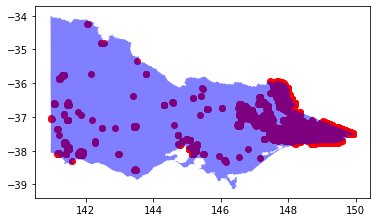

In [31]:
ax = pip_data_4.plot(color='red')
# fire_history_2019.plot(ax = ax, color='red', alpha = 2)
vic_state_b_1.plot(ax=ax, color='blue', alpha = 0.5)
plt.show()

In [33]:
vic_locality_polygon = gpd.read_file('vic_locality_polygon_shp-gda2020/VIC_LOCALITY_POLYGON_shp GDA2020/VIC_LOCALITY_POLYGON_shp.shp')

In [38]:
len(pip_data_4.geometry)

18176

In [51]:
def suburb_finder(c_1):
    j = 0
    for i in range(len(vic_locality_polygon)):
        if c_1.within(vic_locality_polygon.geometry[i]):
#             print('Your suburb is',vic_locality_polygon.iloc[j,6])
            suburb = vic_locality_polygon.iloc[j,6]
            return suburb
        j+=1

In [47]:
pip_data_5 = pip_data_4.reset_index()

In [53]:
list_suburb = []
s = len(pip_data_5)
k=0
for i in range(len(pip_data_5)):
    list_suburb.append(suburb_finder(pip_data_5.geometry[i]))
    k+=1
    print('Progress {} out of {}'.format(k,s), end='\r')
    

In [54]:
len(list_suburb)

18176

In [58]:
len(set(list_suburb))

224

In [64]:
if 'CAULFIELD' in set(list_suburb):
    print('hey')
else:
    print('nay')

nay


In [127]:
pip_data_5.BRIGHTNESS.max()

507.0

In [68]:
pip_data_5['suburb'] = list_suburb

In [70]:
pip_data_5['actual_temp'] = pip_data_5['BRIGHTNESS']*pip_data_5['SCAN']*pip_data_5['TRACK'] 

In [72]:
pip_data_5['actual_temp']-=273.15

In [ ]:
#  df.groupby(['Mt'], sort=False)['count'].max()

In [75]:
pip_data_5.groupby('suburb')['actual_temp'].max()

suburb
ABBEYARD             1887.282
AMPHITHEATRE          160.602
ANGLERS REST         1475.266
APSLEY                207.616
AVENEL                111.872
                       ...   
WULGULMERANG EAST     493.538
WULGULMERANG WEST    2380.998
WUNGHNU               289.818
YALMY                2629.450
YEUNGROON EAST        237.217
Name: actual_temp, Length: 223, dtype: float64

In [137]:
idx = pip_data_5.groupby(['suburb'])['BRIGHTNESS'].transform(max) == pip_data_5['BRIGHTNESS']

In [138]:
pip_data_6 = pip_data_5[idx]

In [139]:
pip_data_6.suburb.value_counts()

YALMY                35
BUCHAN SOUTH         26
WAIREWA              19
BETE BOLONG NORTH    16
GOONGERAH             8
                     ..
HOPETOUN              1
HUNTLY                1
CLIFTON CREEK         1
DINNER PLAIN          1
KNOXFIELD             1
Name: suburb, Length: 223, dtype: int64

In [140]:
pip_data_6.head(2)

,index,LATITUDE,LONGITUDE,BRIGHTNESS,SCAN,TRACK,ACQ_DATE,ACQ_TIME,SATELLITE,INSTRUMENT,CONFIDENCE,VERSION,BRIGHT_T31,FRP,DAYNIGHT,geometry,TYPE,suburb,actual_temp
4,168,-35.770,141.337,411.8,1.3,1.1,2020-01-01 00:00:00,0055,Terra,MODIS,100,6.0NRT,318.8,468.4,D,POINT (141.33700 -35.77000),NaN,BIG DESERT,315.724
34,501,-35.945,147.472,333.3,2.5,1.5,2020-01-01 00:00:00,0330,Aqua,MODIS,72,6.0NRT,310.4,76.8,D,POINT (147.47200 -35.94500),NaN,THOLOGOLONG,976.725


In [84]:
l_1,l_2 = list(pip_data_6[pip_data_6.suburb=='WAIREWA'].LATITUDE), list(pip_data_6[pip_data_6.suburb=='WAIREWA'].LONGITUDE)

In [93]:
round(np.mean(l_1),3), round(np.mean(l_2),3)

(-37.678, 148.18)

In [141]:
pip_data_6[pip_data_6.suburb=='WAIREWA']

,index,LATITUDE,LONGITUDE,BRIGHTNESS,SCAN,TRACK,ACQ_DATE,ACQ_TIME,SATELLITE,INSTRUMENT,CONFIDENCE,VERSION,BRIGHT_T31,FRP,DAYNIGHT,geometry,TYPE,suburb,actual_temp
15119,3505,-37.6687,148.1866,500.0,1.1,1.0,2019-12-30,1310,Terra,MODIS,100,6.3,383.7,0.0,N,POINT (148.18660 -37.66870),0.0,WAIREWA,276.85
15123,3509,-37.6668,148.1986,500.0,1.1,1.0,2019-12-30,1310,Terra,MODIS,100,6.3,321.2,0.0,N,POINT (148.19860 -37.66680),0.0,WAIREWA,276.85
15129,3515,-37.6946,148.2059,500.0,1.1,1.0,2019-12-30,1310,Terra,MODIS,100,6.3,373.6,0.0,N,POINT (148.20590 -37.69460),0.0,WAIREWA,276.85
15167,3553,-37.6624,148.1911,500.0,1.1,1.0,2019-12-30,1310,Terra,MODIS,100,6.3,350.2,0.0,N,POINT (148.19110 -37.66240),0.0,WAIREWA,276.85
15173,3559,-37.6478,148.1619,500.0,1.1,1.0,2019-12-30,1310,Terra,MODIS,100,6.3,374.3,0.0,N,POINT (148.16190 -37.64780),0.0,WAIREWA,276.85
15727,4113,-37.6643,148.1791,500.0,1.1,1.0,2019-12-30,1310,Terra,MODIS,100,6.3,387.0,0.0,N,POINT (148.17910 -37.66430),0.0,WAIREWA,276.85
15732,4118,-37.6551,148.1766,500.0,1.1,1.0,2019-12-30,1310,Terra,MODIS,100,6.3,371.5,0.0,N,POINT (148.17660 -37.65510),0.0,WAIREWA,276.85
15733,4119,-37.6590,148.1522,500.0,1.1,1.0,2019-12-30,1310,Terra,MODIS,100,6.3,360.0,0.0,N,POINT (148.15220 -37.65900),0.0,WAIREWA,276.85
15736,4122,-37.6570,148.1645,500.0,1.1,1.0,2019-12-30,1310,Terra,MODIS,100,6.3,376.9,0.0,N,POINT (148.16450 -37.65700),0.0,WAIREWA,276.85
15748,4134,-37.6663,148.1670,500.0,1.1,1.0,2019-12-30,1310,Terra,MODIS,100,6.3,363.6,0.0,N,POINT (148.16700 -37.66630),0.0,WAIREWA,276.85


In [96]:
print(suburb_finder(Point(-37.678, 148.18)))

None


In [142]:
fire_data_vic_ini = pip_data_6.copy()

In [143]:
fire_data_vic = fire_data_vic_ini[['LATITUDE','LONGITUDE', 'ACQ_DATE','suburb','BRIGHTNESS']].copy()

In [144]:
fire_data_vic.ACQ_DATE = pd.to_datetime(fire_data_vic.ACQ_DATE)

In [145]:
fire_data_vic.ACQ_DATE.astype('str').str[:7].unique()

array(['2020-01', '2020-02', '2019-11', '2019-12'], dtype=object)

In [146]:
fire_data_vic

,LATITUDE,LONGITUDE,ACQ_DATE,suburb,BRIGHTNESS
4,-35.7700,141.3370,2020-01-01,BIG DESERT,411.8
34,-35.9450,147.4720,2020-01-01,THOLOGOLONG,333.3
1113,-37.2600,147.5750,2020-01-02,SWIFTS CREEK,309.6
1132,-37.7340,148.3460,2020-01-02,SIMPSONS CREEK,344.4
1194,-38.0540,141.8850,2020-01-02,MACARTHUR,383.9
...,...,...,...,...,...
17476,-36.2524,147.8458,2019-12-31,COLAC COLAC,343.5
17503,-37.0918,142.1820,2019-12-31,BRIMPAEN,328.4
17532,-37.3554,141.1651,2019-12-31,DERGHOLM,369.4
17550,-36.0507,147.8087,2019-12-31,WALWA,455.8


In [148]:
fire_data_vic_final = fire_data_vic.drop_duplicates(subset=['suburb', 'BRIGHTNESS'], keep='last')

In [157]:
fire_data_vic_final.BRIGHTNESS-=273.15

c:\python38\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [160]:
fire_data_vic_final.BRIGHTNESS = round(fire_data_vic_final.BRIGHTNESS,2)

c:\python38\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [164]:
fire_data_vic_final.BRIGHTNESS.max()

233.85

In [163]:
fire_data_vic_final.BRIGHTNESS.min()

27.25

In [168]:
ranges = [0,50,150,200,250]
fire_data_vic_final.groupby(pd.cut(fire_data_vic_final.BRIGHTNESS, ranges))['BRIGHTNESS'].count()

BRIGHTNESS
(0, 50]        39
(50, 150]     111
(150, 200]     25
(200, 250]     48
Name: BRIGHTNESS, dtype: int64

In [161]:
fire_data_vic_final

,LATITUDE,LONGITUDE,ACQ_DATE,suburb,BRIGHTNESS
4,-35.7700,141.3370,2020-01-01,BIG DESERT,138.65
34,-35.9450,147.4720,2020-01-01,THOLOGOLONG,60.15
1113,-37.2600,147.5750,2020-01-02,SWIFTS CREEK,36.45
1132,-37.7340,148.3460,2020-01-02,SIMPSONS CREEK,71.25
1194,-38.0540,141.8850,2020-01-02,MACARTHUR,110.75
...,...,...,...,...,...
17476,-36.2524,147.8458,2019-12-31,COLAC COLAC,70.35
17503,-37.0918,142.1820,2019-12-31,BRIMPAEN,55.25
17532,-37.3554,141.1651,2019-12-31,DERGHOLM,96.25
17550,-36.0507,147.8087,2019-12-31,WALWA,182.65


In [169]:
fire_data_vic_final.columns = ['LATITUDE','LONGITUDE','ACQ_DATE','suburb','TEMPERATURE(celsius)']

In [171]:
fire_data_vic_final.reset_index().to_csv('fire_data_victoria.csv')

In [172]:
occ_vic_outside_new.to_csv('occ_vic_outside_new.csv')

NameError: name 'occ_vic_outside_new' is not defined

In [221]:
# for i in inter_bush_neigh_dissolve_geom.geometry:
#     print(i)

In [223]:
vic_locality_polygon = gpd.read_file('vic_locality_polygon_shp-gda2020/VIC_LOCALITY_POLYGON_shp GDA2020/VIC_LOCALITY_POLYGON_shp.shp')

In [228]:
species_vic_also_mod_con.head()

,index,OBJECTID,Shape_Leng,Shape_Area,listed_id,map_id,sci_name,comm_name,threatened,migratory,...,tax_order,tax_class,tax_phylum,tax_king,other_ids,cell_size,regions,attributio,sprat_prof,geometry
0,0,35,803.88,1340.4448,36,36,Balaenoptera musculus,Blue Whale,Endangered,Migratory,...,Cetacea,Mammalia,Chordata,Animalia,None,0.01,NT; CI; QLD; NSW; TAS; VIC; WA; ACI; CSI; SA; ...,Species 1km Grids August 2019 Canberra: Depart...,http://www.environment.gov.au/cgi-bin/sprat/pu...,"MULTIPOLYGON (((153.22000 -68.35000, 153.25000..."
1,1,36,396.02,373.2306,36,36,Balaenoptera musculus,Blue Whale,Endangered,Migratory,...,Cetacea,Mammalia,Chordata,Animalia,None,0.01,NT; CI; QLD; NSW; TAS; VIC; WA; ACI; CSI; SA; ...,Species 1km Grids August 2019 Canberra: Depart...,http://www.environment.gov.au/cgi-bin/sprat/pu...,"MULTIPOLYGON (((133.51000 -32.14000, 133.50000..."
2,2,43,400.30,265.6278,40,40,Eubalaena australis,Southern Right Whale,Endangered,None,...,Cetacea,Mammalia,Chordata,Animalia,75529,0.01,QLD; NSW; TAS; VIC; WA; CSI; SA; HMI; AAT; JBT...,Species 1km Grids August 2019 Canberra: Depart...,http://www.environment.gov.au/cgi-bin/sprat/pu...,"MULTIPOLYGON (((159.04000 -51.00000, 159.04000..."
3,3,44,696.52,964.8850,40,40,Eubalaena australis,Southern Right Whale,Endangered,None,...,Cetacea,Mammalia,Chordata,Animalia,75529,0.01,QLD; NSW; TAS; VIC; WA; CSI; SA; HMI; AAT; JBT...,Species 1km Grids August 2019 Canberra: Depart...,http://www.environment.gov.au/cgi-bin/sprat/pu...,"MULTIPOLYGON (((142.05000 -63.44000, 142.05000..."
4,4,84,8.06,0.6568,77,77,Pseudomys shortridgei,"Heath Mouse, Dayang, Heath Rat",Endangered,None,...,Rodentia,Mammalia,Chordata,Animalia,None,0.01,VIC; WA; SA,Species 1km Grids August 2019 Canberra: Depart...,http://www.environment.gov.au/cgi-bin/sprat/pu...,"MULTIPOLYGON (((141.16000 -37.39000, 141.16000..."


In [227]:
vic_locality_polygon.head()

,LC_PLY_PID,DT_CREATE,DT_RETIRE,LOC_PID,VIC_LOCALI,VIC_LOCA_1,VIC_LOCA_2,VIC_LOCA_3,VIC_LOCA_4,VIC_LOCA_5,VIC_LOCA_6,VIC_LOCA_7,geometry
0,6670,2011-08-31,None,VIC2615,2012-04-27,None,UNDERBOOL,None,None,G,None,2,"POLYGON ((141.74553 -35.07227, 141.74553 -35.0..."
1,6671,2011-08-31,None,VIC1986,2012-04-27,None,NURRAN,None,None,G,None,2,"POLYGON ((148.66877 -37.39570, 148.66877 -37.3..."
2,6672,2011-08-31,None,VIC2862,2012-04-27,None,WOORNDOO,None,None,G,None,2,"POLYGON ((142.92289 -37.97885, 142.90450 -37.9..."
3,6673,2011-08-31,None,VIC734,2018-08-03,None,DEPTFORD,None,None,G,None,2,"POLYGON ((147.82336 -37.66000, 147.82313 -37.6..."
4,6674,2011-08-31,None,VIC2900,2012-04-27,None,YANAC,None,None,G,None,2,"POLYGON ((141.27979 -35.99858, 141.27989 -35.9..."


In [236]:
l_1 = 0
for j in vic_locality_polygon.geometry:
    print(vic_locality_polygon.iloc[l_1,6])
    l_1+=1

UNDERBOOL
NURRAN
WOORNDOO
DEPTFORD
YANAC
MOORALLA
MINIMAY
GLEN FORBES
ADAMS ESTATE
CARAG CARAG
MANOR LAKES
CANNUM
WALLUP
MURRA WARRA
KALKEE
WAIL
PIMPINIO
DOOEN
VECTIS
QUANTONG
STANHOPE
TERRICK TERRICK
METCALFE EAST
OMEO
LOGAN
TOM GROGGIN
TAMBOON
WONGUNGARRA
WILSONS PROMONTORY
GUILDFORD
WILLAURA
COBBERAS
MACLEOD
HEIDELBERG WEST
MONEGEETTA
PERONNE
DRUMANURE
TUTYE
DUNKELD
SUGGAN BUGGAN
BAW BAW
LARPENT
MURROON
WAHRING
COOJAR
SEAVIEW
LABERTOUCHE
DEEPDENE
DROUIN WEST
JINDIVICK
GREENS CREEK
MURRAYVILLE
EDENHOPE
WARRACKNABEAL
DARTMOOR
DANDONGADALE
GELANTIPY
LINGA
BOINKA
TENBY POINT
CORONET BAY
CORINELLA
CROYDON SOUTH
BANKSIA PENINSULA
GEORGES CREEK
PASCOE VALE
KULWIN
WALPEUP
WYCHEPROOF
MARENGO
CAPE OTWAY
WATTLE HILL
GELLIBRAND LOWER
PRINCETOWN
PETERBOROUGH
SCOTSBURN
REEDY CREEK
WHEATSHEAF
JUNGABURRA
BARJARG
KEYSBOROUGH
FUMINA
SURREY HILLS
BUNGADOR
RAVENHALL
NYAH WEST
MINMINDIE
LAHARUM
WATCHUPGA
NAREEN
HOTSPUR
PIONEER BAY
LANG LANG
DHURRINGILE
SWANWATER
ANDERSON
BASS
BANGHOLME
TANJIL BREN
DUVER

GIRGARRE EAST
MOUNT CLEAR
KILLINGWORTH
CANADIAN
CATUMNAL
BRUARONG
DOCKER
ULTIMA EAST
BENLOCH
COSGROVE SOUTH
MITCHELLSTOWN
CLIFTON CREEK
BUNGAL
OUTTRIM
TALBOT
GOLDIE
MOUNT NAPIER
PINE LODGE
BENGWORDEN
BAILIESTON
WEHLA
BARRAPORT WEST
JERUK
GLENFALLOCH
LOWER PLENTY
ELTHAM NORTH
BARKSTEAD
ROCKLYN
ARCADIA SOUTH
BOWEYA NORTH
MIEPOLL
LONGWOOD
NAREEB
BEARS LAGOON
ROSEWHITE
BANNERTON
EAST WARBURTON
MCMAHONS CREEK
TOORONGO
SNAKE VALLEY
KOO WEE RUP
KANYAPELLA
GATUM
CAVENDISH
COLERAINE
ROKEWOOD
SKIPTON
BOTANIC RIDGE
CAMPBELLTOWN
KARNAK
NERRIN NERRIN
AMPHITHEATRE
JAMIESON
ALTONA MEADOWS
WAREEK
ARCADIA
STAVELY
DARLIMURLA
GOSCHEN
WILLUNG SOUTH
ARARAT
SHELBOURNE
MARNOO
WANDO VALE
ORFORD
BRINGALBERT
BANYAN
GRAYS BRIDGE
ROSLYNMEAD
WALLACEDALE
MOUNT MERCER
KELLALAC
KAMAROOKA
WELLSFORD
FOSTERVILLE
CORRINGLE
MARLO
BAIRNSDALE
COTSWOLD
CRANBOURNE
ELTHAM
KOLORA
GOON NURE
NAR NAR GOON NORTH
KEWELL
WICKLIFFE
BEECHWORTH
DRUMMARTIN
JANCOURT EAST
GLENFYNE
MYAMYN
TALLANDOON
GLENLOFTY
DROMANA
WATSONIA
DANDENONG NORT

In [241]:
dict_1 = {}
dict_1['a'] = 'abc'

In [242]:
dict_1

{'a': 'abc'}

In [243]:
dict_1['a']+=', '+'abc'

In [244]:
dict_1

{'a': 'abc, abc'}

In [254]:
s = len(species_vic_also_mod_con)
k=0
dict_species_loc = {}
for i in species_vic_also_mod_con.geometry:
    l=0
    for j in vic_locality_polygon.geometry:
#         print(species_vic_also_mod_con.iloc[k,7])
        if i.intersects(j):
            if species_vic_also_mod_con.iloc[k,7] not in dict_species_loc.keys():
                dict_species_loc[species_vic_also_mod_con.iloc[k,7]] = vic_locality_polygon.iloc[l,6]
            else:
                dict_species_loc[species_vic_also_mod_con.iloc[k,7]] += ', ' + vic_locality_polygon.iloc[l,6]
        l+=1
    k+=1
    print('Progress {} out of {}'.format(k,s), end='\r')

In [255]:
dict_species_loc

{'Blue Whale': 'TAMBOON, WILSONS PROMONTORY, MARENGO, CAPE OTWAY, WATTLE HILL, GELLIBRAND LOWER, PRINCETOWN, PETERBOROUGH, SKENES CREEK, NELSON, MOUNT RICHMOND, DALYSTON, ROSEBROOK, PETTICOAT CREEK, CAPE PATERSON, KILCUNDA, WINGAN RIVER, HORDERN VALE, TOWER HILL, WYE RIVER, CAPE BRIDGEWATER, KENNETT RIVER, GREY RIVER, HARMERS HAVEN, MALLACOOTA, ANGLESEA, TYRENDARRA EAST, MOGGS CREEK, PARADISE BEACH, FAIRHAVEN, EASTERN VIEW, SMITHS BEACH, AIREYS INLET, ILLOWA, LAKES ENTRANCE, LAKE BUNGA, SUNDERLAND BAY, PORT FAIRY, TIDAL RIVER, WOODSIDE BEACH, JAN JUC, CAPE WOOLAMAI, DARRIMAN, SUMMERLANDS, APOLLO BAY, BLAIRGOWRIE, SURF BEACH, BIG HILL, RHYLL, THE COVE, MEPUNGA, GIPSY POINT, DENNINGTON, NEWHAVEN, ROBERTSONS BEACH, LANGSBOROUGH, CAPE CONRAN, WARATAH BAY, VENUS BAY, THE HONEYSUCKLES, LAKE TYERS BEACH, BELLS BEACH, FLAMINGO BEACH, NIRRANDA, CAPE SCHANCK, WAYGARA, LORNE, OCEAN GRANGE, WALKERVILLE NORTH, NYERIMILANG, PORT ALBERT, SIMPSONS CREEK, KALIMNA, SORRENTO, MANNS BEACH, GOLDEN BEACH, K

In [257]:
len(dict_species_loc.keys())

112

In [258]:
import json

# # as requested in comment
# exDict = {'exDict': exDict}

with open('dict_species_loc.txt', 'w') as file:
     file.write(json.dumps(dict_species_loc)) 

In [261]:
species_suburbs_ini = pd.DataFrame(list(dict_species_loc.items()))

In [262]:
species_suburbs_ini.columns = ['species', 'suburbs']

In [263]:
species_suburbs_ini

,species,suburbs
0,Blue Whale,"TAMBOON, WILSONS PROMONTORY, MARENGO, CAPE OTW..."
1,Southern Right Whale,"GLEN FORBES, TAMBOON, WILSONS PROMONTORY, TENB..."
2,"Heath Mouse, Dayang, Heath Rat","MOORALLA, DUNKELD, DARTMOOR, HOTSPUR, GRAMPIAN..."
3,"Smoky Mouse, Konoom","NURRAN, MOORALLA, OMEO, TOM GROGGIN, TAMBOON, ..."
4,Long-footed Potoroo,"NURRAN, TAMBOON, WONGUNGARRA, DANDONGADALE, CH..."
...,...,...
107,"Littlejohn's Tree Frog, Heath Frog","NURRAN, TAMBOON, GELANTIPY, CHANDLERS CREEK, G..."
108,"Eastern Dwarf Galaxias, Dwarf Galaxias","WOORNDOO, MOORALLA, MINIMAY, GLEN FORBES, MANO..."
109,"School Shark, Eastern School Shark, Snapper Sh...","TAMBOON, WINGAN RIVER, MALLACOOTA, LAKES ENTRA..."
110,Southern Bluefin Tuna,"GLEN FORBES, TAMBOON, WILSONS PROMONTORY, TENB..."


In [264]:
suburb_affected_area = pd.read_csv('suburb_affected_area.csv')

In [268]:
suburb_bushfires = suburb_affected_area[suburb_affected_area['bushfire_affected']=='Yes']

In [271]:
list_suburb_bushfire = list(suburb_bushfires.Suburb)

In [272]:
list_suburb_bushfire

['NURRAN',
 'WOORNDOO',
 'DEPTFORD',
 'MOORALLA',
 'MINIMAY',
 'WAIL',
 'DOOEN',
 'OMEO',
 'TOM GROGGIN',
 'TAMBOON',
 'WONGUNGARRA',
 'COBBERAS',
 'DUNKELD',
 'SUGGAN BUGGAN',
 'EDENHOPE',
 'DARTMOOR',
 'DANDONGADALE',
 'GELANTIPY',
 'BOINKA',
 'HOTSPUR',
 'GRAMPIANS',
 'BENALLA',
 'KOOREH',
 'NHILL',
 'DARTMOUTH',
 'LILLIMUR',
 'WULGULMERANG WEST',
 'BRANXHOLME',
 'GLEN VALLEY',
 'SWIFTS CREEK',
 'ROCKLANDS',
 'LANGKOOP',
 'BUCHAN SOUTH',
 'MACARTHUR',
 'MAFEKING',
 'UPPER GUNDOWRING',
 'NELSON',
 'POWERS CREEK',
 'LAKE MUNDI',
 'CHANDLERS CREEK',
 'HARROW',
 'GENOA',
 'DRUMBORG',
 'TORRITA',
 'NELSE',
 'BULDAH',
 'BIG DESERT',
 'BENAMBRA',
 'WINGAN RIVER',
 'COMBIENBAR',
 'MARTHAVALE',
 'NOORINBEE NORTH',
 'TOOMBON',
 'MURRINDINDI',
 'WULGULMERANG',
 'WULGULMERANG EAST',
 'BRUMBY',
 'NOORINBEE',
 'PATYAH',
 'PENTLAND HILLS',
 'WISELEIGH',
 'BELLBIRD CREEK',
 'BUCKLAND',
 'MOUNT BUFFALO',
 'MALLACOOTA',
 'BARWON DOWNS',
 'APSLEY',
 'HOWITT PLAINS',
 'CALIFORNIA GULLY',
 'ROCKY POINT'

In [289]:
all_suburbs = []
for i in species_suburbs_ini.suburbs:
    for j in i.split(', '):
        all_suburbs.append(j)

In [290]:
len(set(all_suburbs))

2957

In [282]:
indx = 0
dict_indx = {}
for i in species_suburbs_ini.suburbs:
    for j in i.split(', '):
        if j in list_suburb_bushfire:
            if indx not in dict_indx.keys():
                dict_indx[indx] = j
            else:
                dict_indx[indx] += ', ' + j
    indx+=1

In [283]:
dict_indx

{0: 'TAMBOON, NELSON, WINGAN RIVER, MALLACOOTA, APOLLO BAY, BIG HILL, GIPSY POINT, CAPE CONRAN, WAYGARA, SIMPSONS CREEK, CORRINGLE, MARLO, BEMM RIVER, WOMBAT CREEK, SEPARATION CREEK, TOSTAREE',
 1: 'TAMBOON, NELSON, WINGAN RIVER, MALLACOOTA, FRENCH ISLAND, APOLLO BAY, BIG HILL, GIPSY POINT, CAPE CONRAN, WAYGARA, SIMPSONS CREEK, CORRINGLE, MARLO, BEMM RIVER, WOMBAT CREEK, SEPARATION CREEK, TOSTAREE',
 2: 'MOORALLA, DUNKELD, DARTMOOR, HOTSPUR, GRAMPIANS, ROCKLANDS, MAFEKING, NELSON, LAKE MUNDI, DRUMBORG, KILLARA, DERGHOLM, BRIMPAEN, TELANGATUK EAST, MUMBANNAR, POMONAL, CORNDALE, GREENWALD, WINNAP, MOORALLA, DUNKELD, EDENHOPE, DARTMOOR, HOTSPUR, GRAMPIANS, BRANXHOLME, ROCKLANDS, LANGKOOP, MACARTHUR, MAFEKING, NELSON, POWERS CREEK, LAKE MUNDI, APSLEY, KILLARA, BESSIEBELLE, LAKE CONDAH, HOMERTON, DERGHOLM, BRIMPAEN, TELANGATUK EAST, CAVENDISH, MOUTAJUP, MOYSTON, BREAKAWAY CREEK, POOLAIJELO, MUMBANNAR, POMONAL, CORNDALE, CONNEWIRRICOO',
 3: 'NURRAN, MOORALLA, OMEO, TOM GROGGIN, TAMBOON, WONG

In [292]:
species_suburbs_ini_1 = pd.DataFrame(list(dict_indx.items()))

In [294]:
species_suburbs_ini_1.columns = ['index_col', 'suburbs']

In [297]:
list_1 = list(species_suburbs_ini_1.index_col)
for i in range(112):
    if i not in (list_1):
        print(i)

73
100


In [298]:
dict_indx[73] = ''
dict_indx[100] = ''

In [303]:
species_suburbs_ini_2 = species_suburbs_ini.reset_index()

In [304]:
species_suburbs_ini_2

,index,species,suburbs
0,0,Blue Whale,"TAMBOON, WILSONS PROMONTORY, MARENGO, CAPE OTW..."
1,1,Southern Right Whale,"GLEN FORBES, TAMBOON, WILSONS PROMONTORY, TENB..."
2,2,"Heath Mouse, Dayang, Heath Rat","MOORALLA, DUNKELD, DARTMOOR, HOTSPUR, GRAMPIAN..."
3,3,"Smoky Mouse, Konoom","NURRAN, MOORALLA, OMEO, TOM GROGGIN, TAMBOON, ..."
4,4,Long-footed Potoroo,"NURRAN, TAMBOON, WONGUNGARRA, DANDONGADALE, CH..."
...,...,...,...
107,107,"Littlejohn's Tree Frog, Heath Frog","NURRAN, TAMBOON, GELANTIPY, CHANDLERS CREEK, G..."
108,108,"Eastern Dwarf Galaxias, Dwarf Galaxias","WOORNDOO, MOORALLA, MINIMAY, GLEN FORBES, MANO..."
109,109,"School Shark, Eastern School Shark, Snapper Sh...","TAMBOON, WINGAN RIVER, MALLACOOTA, LAKES ENTRA..."
110,110,Southern Bluefin Tuna,"GLEN FORBES, TAMBOON, WILSONS PROMONTORY, TENB..."


In [307]:
species_suburbs_ini_3 = pd.DataFrame(list(dict_indx.items()))

In [308]:
species_suburbs_ini_3

,0,1
0,0,"TAMBOON, NELSON, WINGAN RIVER, MALLACOOTA, APO..."
1,1,"TAMBOON, NELSON, WINGAN RIVER, MALLACOOTA, FRE..."
2,2,"MOORALLA, DUNKELD, DARTMOOR, HOTSPUR, GRAMPIAN..."
3,3,"NURRAN, MOORALLA, OMEO, TOM GROGGIN, TAMBOON, ..."
4,4,"NURRAN, TAMBOON, WONGUNGARRA, DANDONGADALE, CH..."
...,...,...
107,109,"TAMBOON, WINGAN RIVER, MALLACOOTA, CAPE CONRAN..."
108,110,"TAMBOON, NELSON, GENOA, WINGAN RIVER, MALLACOO..."
109,111,"TAMBOON, NELSON, GENOA, WINGAN RIVER, MALLACOO..."
110,73,


In [309]:
species_suburbs_ini_3.columns = ['index', 'suburbs_bushfire']

In [311]:
species_suburbs = species_suburbs_ini_2.merge( species_suburbs_ini_3, on = 'index')

In [317]:
species_suburbs

,index,species,suburbs,suburbs_bushfire
0,0,Blue Whale,"TAMBOON, WILSONS PROMONTORY, MARENGO, CAPE OTW...","TAMBOON, NELSON, WINGAN RIVER, MALLACOOTA, APO..."
1,1,Southern Right Whale,"GLEN FORBES, TAMBOON, WILSONS PROMONTORY, TENB...","TAMBOON, NELSON, WINGAN RIVER, MALLACOOTA, FRE..."
2,2,"Heath Mouse, Dayang, Heath Rat","MOORALLA, DUNKELD, DARTMOOR, HOTSPUR, GRAMPIAN...","MOORALLA, DUNKELD, DARTMOOR, HOTSPUR, GRAMPIAN..."
3,3,"Smoky Mouse, Konoom","NURRAN, MOORALLA, OMEO, TOM GROGGIN, TAMBOON, ...","NURRAN, MOORALLA, OMEO, TOM GROGGIN, TAMBOON, ..."
4,4,Long-footed Potoroo,"NURRAN, TAMBOON, WONGUNGARRA, DANDONGADALE, CH...","NURRAN, TAMBOON, WONGUNGARRA, DANDONGADALE, CH..."
...,...,...,...,...
107,107,"Littlejohn's Tree Frog, Heath Frog","NURRAN, TAMBOON, GELANTIPY, CHANDLERS CREEK, G...","NURRAN, TAMBOON, GELANTIPY, CHANDLERS CREEK, G..."
108,108,"Eastern Dwarf Galaxias, Dwarf Galaxias","WOORNDOO, MOORALLA, MINIMAY, GLEN FORBES, MANO...","WOORNDOO, MOORALLA, MINIMAY, DUNKELD, EDENHOPE..."
109,109,"School Shark, Eastern School Shark, Snapper Sh...","TAMBOON, WINGAN RIVER, MALLACOOTA, LAKES ENTRA...","TAMBOON, WINGAN RIVER, MALLACOOTA, CAPE CONRAN..."
110,110,Southern Bluefin Tuna,"GLEN FORBES, TAMBOON, WILSONS PROMONTORY, TENB...","TAMBOON, NELSON, GENOA, WINGAN RIVER, MALLACOO..."


In [313]:
species_suburbs[(species_suburbs['index']==73) | (species_suburbs['index']==100)]

,index,species,suburbs,suburbs_bushfire
73,73,Blue Petrel,"ROBERTSONS BEACH, PORT ALBERT, MANNS BEACH, WO...",
100,100,Giant Gippsland Earthworm,"GLEN FORBES, SEAVIEW, DROUIN WEST, JINDIVICK, ...",


In [316]:
species_suburbs_bush = species_suburbs[['species', 'suburbs_bushfire']]

In [318]:
species_suburbs_bush

,species,suburbs_bushfire
0,Blue Whale,"TAMBOON, NELSON, WINGAN RIVER, MALLACOOTA, APO..."
1,Southern Right Whale,"TAMBOON, NELSON, WINGAN RIVER, MALLACOOTA, FRE..."
2,"Heath Mouse, Dayang, Heath Rat","MOORALLA, DUNKELD, DARTMOOR, HOTSPUR, GRAMPIAN..."
3,"Smoky Mouse, Konoom","NURRAN, MOORALLA, OMEO, TOM GROGGIN, TAMBOON, ..."
4,Long-footed Potoroo,"NURRAN, TAMBOON, WONGUNGARRA, DANDONGADALE, CH..."
...,...,...
107,"Littlejohn's Tree Frog, Heath Frog","NURRAN, TAMBOON, GELANTIPY, CHANDLERS CREEK, G..."
108,"Eastern Dwarf Galaxias, Dwarf Galaxias","WOORNDOO, MOORALLA, MINIMAY, DUNKELD, EDENHOPE..."
109,"School Shark, Eastern School Shark, Snapper Sh...","TAMBOON, WINGAN RIVER, MALLACOOTA, CAPE CONRAN..."
110,Southern Bluefin Tuna,"TAMBOON, NELSON, GENOA, WINGAN RIVER, MALLACOO..."


In [333]:
list(species_suburbs_bush[species_suburbs_bush['species']=='Brush-tailed Rock-wallaby'].suburbs_bushfire)

['DEPTFORD, MOORALLA, OMEO, WONGUNGARRA, COBBERAS, DUNKELD, SUGGAN BUGGAN, GELANTIPY, GRAMPIANS, WULGULMERANG WEST, GLEN VALLEY, SWIFTS CREEK, BUCHAN SOUTH, MAFEKING, BENAMBRA, MARTHAVALE, WULGULMERANG, WULGULMERANG EAST, BRUMBY, YALMY, BUCHAN, STIRLING, BROOKVILLE, MURRINDAL, WENTWORTH, TAMBO CROSSING, WATERHOLES, ANGLERS REST, BRIMPAEN, BUTCHERS RIDGE, W TREE, DARGO, BONANG, MOYSTON, WOOLENOOK, ENSAY, NUNNIONG, REEDY FLAT, DEDDICK VALLEY, DOUBLE BRIDGES, MIOWERA, BULLUMWAAL, POMONAL, BINDI, TIMBARRA, COBBANNAH, RYANS, ENSAY NORTH, NURRAN, DEPTFORD, MOORALLA, OMEO, WONGUNGARRA, COBBERAS, DUNKELD, SUGGAN BUGGAN, GELANTIPY, GRAMPIANS, DARTMOUTH, WULGULMERANG WEST, GLEN VALLEY, SWIFTS CREEK, ROCKLANDS, BUCHAN SOUTH, MAFEKING, NELSE, BENAMBRA, WULGULMERANG, WULGULMERANG EAST, BRUMBY, WISELEIGH, YALMY, BUCHAN, MURRINDAL, WENTWORTH, SHANNONVALE, MOSSIFACE, GRANITE ROCK, NICHOLSON, SARSFIELD, TAMBO CROSSING, WATERHOLES, TAMBO UPPER, FAIRY DELL, ANGLERS REST, BRIMPAEN, BUTCHERS RIDGE, W TREE,

In [334]:
# for i in list(species_suburbs_bush.species):
#     print(i)

In [395]:
', '.join(list(set(['a', 'b', 'a', 's', 'd', 'c', 'c', 'a'])))

'b, a, s, d, c'

In [396]:
dict_new = {}
k=0
for i in species_suburbs_bush.suburbs_bushfire:
#     dummy = []
    dummy = i.split(', ')
    print(', '.join(list(set(dummy))))
    dict_new[k] = ', '.join(list(set(dummy)))
    print('-------------')
    k+=1

WAYGARA, CORRINGLE, TOSTAREE, BIG HILL, SIMPSONS CREEK, MARLO, WOMBAT CREEK, NELSON, WINGAN RIVER, TAMBOON, GIPSY POINT, CAPE CONRAN, MALLACOOTA, APOLLO BAY, SEPARATION CREEK, BEMM RIVER
-------------
WAYGARA, CORRINGLE, FRENCH ISLAND, TOSTAREE, BIG HILL, SIMPSONS CREEK, MARLO, WOMBAT CREEK, NELSON, WINGAN RIVER, TAMBOON, GIPSY POINT, CAPE CONRAN, MALLACOOTA, APOLLO BAY, SEPARATION CREEK, BEMM RIVER
-------------
POMONAL, CONNEWIRRICOO, MOORALLA, NELSON, LAKE MUNDI, GREENWALD, DERGHOLM, CAVENDISH, MOUTAJUP, APSLEY, HOTSPUR, CORNDALE, BESSIEBELLE, BRANXHOLME, TELANGATUK EAST, HOMERTON, KILLARA, DARTMOOR, POOLAIJELO, MUMBANNAR, WINNAP, MAFEKING, BRIMPAEN, POWERS CREEK, BREAKAWAY CREEK, DUNKELD, GRAMPIANS, ROCKLANDS, EDENHOPE, LANGKOOP, DRUMBORG, LAKE CONDAH, MACARTHUR, MOYSTON
-------------
WARRENMANG, MURRINDAL, WHOROULY SOUTH, BENDOC, UPPER GUNDOWRING, NELSON, ESKDALE, WALLAGARAUGH, LEXTON, TAMBO CROSSING, CHEPSTOWE, CHESHUNT, GEMBROOK, MOUNT TAYLOR, LUCYVALE, BONANG, SHELFORD, NUG NUG

In [397]:
dict_new

{0: 'WAYGARA, CORRINGLE, TOSTAREE, BIG HILL, SIMPSONS CREEK, MARLO, WOMBAT CREEK, NELSON, WINGAN RIVER, TAMBOON, GIPSY POINT, CAPE CONRAN, MALLACOOTA, APOLLO BAY, SEPARATION CREEK, BEMM RIVER',
 1: 'WAYGARA, CORRINGLE, FRENCH ISLAND, TOSTAREE, BIG HILL, SIMPSONS CREEK, MARLO, WOMBAT CREEK, NELSON, WINGAN RIVER, TAMBOON, GIPSY POINT, CAPE CONRAN, MALLACOOTA, APOLLO BAY, SEPARATION CREEK, BEMM RIVER',
 2: 'POMONAL, CONNEWIRRICOO, MOORALLA, NELSON, LAKE MUNDI, GREENWALD, DERGHOLM, CAVENDISH, MOUTAJUP, APSLEY, HOTSPUR, CORNDALE, BESSIEBELLE, BRANXHOLME, TELANGATUK EAST, HOMERTON, KILLARA, DARTMOOR, POOLAIJELO, MUMBANNAR, WINNAP, MAFEKING, BRIMPAEN, POWERS CREEK, BREAKAWAY CREEK, DUNKELD, GRAMPIANS, ROCKLANDS, EDENHOPE, LANGKOOP, DRUMBORG, LAKE CONDAH, MACARTHUR, MOYSTON',
 3: 'WARRENMANG, MURRINDAL, WHOROULY SOUTH, BENDOC, UPPER GUNDOWRING, NELSON, ESKDALE, WALLAGARAUGH, LEXTON, TAMBO CROSSING, CHEPSTOWE, CHESHUNT, GEMBROOK, MOUNT TAYLOR, LUCYVALE, BONANG, SHELFORD, NUG NUG, HOTSPUR, DANDO

In [398]:
dummy

['TAMBOON',
 'NELSON',
 'GENOA',
 'WINGAN RIVER',
 'MALLACOOTA',
 'FRENCH ISLAND',
 'APOLLO BAY',
 'BIG HILL',
 'GIPSY POINT',
 'CAPE CONRAN',
 'WAYGARA',
 'SIMPSONS CREEK',
 'CORRINGLE',
 'MARLO',
 'BEMM RIVER',
 'WOMBAT CREEK',
 'SEPARATION CREEK',
 'TOSTAREE']

In [363]:
# lst = list(species_suburbs_bush.suburbs_bushfire)

In [362]:
# [[i] for i in lst]

In [399]:
species_suburbs_dummy = pd.DataFrame(list(dict_new.items()))

In [400]:
species_suburbs_dummy.columns = ['index', 'suburbs_bushfire_unique']

In [401]:
species_suburbs_bush_final = species_suburbs_dummy.merge(species_suburbs_bush.reset_index(), on = 'index')

In [402]:
species_suburbs_bush_final = species_suburbs_bush_final[['species', 'suburbs_bushfire_unique']]

In [403]:
species_suburbs_bush_final

,species,suburbs_bushfire_unique
0,Blue Whale,"WAYGARA, CORRINGLE, TOSTAREE, BIG HILL, SIMPSO..."
1,Southern Right Whale,"WAYGARA, CORRINGLE, FRENCH ISLAND, TOSTAREE, B..."
2,"Heath Mouse, Dayang, Heath Rat","POMONAL, CONNEWIRRICOO, MOORALLA, NELSON, LAKE..."
3,"Smoky Mouse, Konoom","WARRENMANG, MURRINDAL, WHOROULY SOUTH, BENDOC,..."
4,Long-footed Potoroo,"MURRINDAL, BENDOC, JARRAHMOND, UPPER GUNDOWRIN..."
...,...,...
107,"Littlejohn's Tree Frog, Heath Frog","MURRINDAL, BENDOC, JARRAHMOND, WALLAGARAUGH, T..."
108,"Eastern Dwarf Galaxias, Dwarf Galaxias","DUNDONNELL, NELSON, LEXTON, CHEPSTOWE, AVONDAL..."
109,"School Shark, Eastern School Shark, Snapper Sh...","WAYGARA, CORRINGLE, SIMPSONS CREEK, MARLO, WOM..."
110,Southern Bluefin Tuna,"NICHOLSON, FRENCH ISLAND, BIG HILL, NELSON, WI..."


In [404]:
list(species_suburbs_bush_final[species_suburbs_bush_final['species']=='Brush-tailed Rock-wallaby'].suburbs_bushfire_unique)

['NUNNIONG, WULGULMERANG EAST, POMONAL, BINDI, TIMBARRA, NICHOLSON, NELSE, MURRINDAL, YALMY, MOORALLA, BENDOC, RYANS, NURRAN, COBUNGRA, JARRAHMOND, BRUTHEN, W TREE, DEDDICK VALLEY, TAMBO CROSSING, DOUBLE BRIDGES, BENAMBRA, WATERHOLES, MOUNT TAYLOR, SHANNONVALE, MIOWERA, DARGO, BONANG, SARSFIELD, CAVENDISH, MOUTAJUP, MOSSIFACE, NOWA NOWA, BUTCHERS RIDGE, WOOLENOOK, ENSAY, REEDY FLAT, SWIFTS CREEK, BETE BOLONG NORTH, STIRLING, WULGULMERANG WEST, CLIFTON CREEK, BUCHAN, MARTHAVALE, MAFEKING, BRIMPAEN, BULLUMWAAL, GRANITE ROCK, STOCKDALE, GOONGERAH, COBBANNAH, BUNDARA, DUNKELD, SUGGAN BUGGAN, ANGLERS REST, GRAMPIANS, GLEN VALLEY, ROCKLANDS, WISELEIGH, TAMBO UPPER, GELANTIPY, BROOKVILLE, ENSAY NORTH, DARTMOUTH, BETE BOLONG, WULGULMERANG, BRUMBY, OMEO, FAIRY DELL, COBBERAS, WONGUNGARRA, NARIEL VALLEY, BUCHAN SOUTH, MITTA MITTA, WENTWORTH, DEPTFORD, MOYSTON']

In [405]:
species_suburbs_bush_final

,species,suburbs_bushfire_unique
0,Blue Whale,"WAYGARA, CORRINGLE, TOSTAREE, BIG HILL, SIMPSO..."
1,Southern Right Whale,"WAYGARA, CORRINGLE, FRENCH ISLAND, TOSTAREE, B..."
2,"Heath Mouse, Dayang, Heath Rat","POMONAL, CONNEWIRRICOO, MOORALLA, NELSON, LAKE..."
3,"Smoky Mouse, Konoom","WARRENMANG, MURRINDAL, WHOROULY SOUTH, BENDOC,..."
4,Long-footed Potoroo,"MURRINDAL, BENDOC, JARRAHMOND, UPPER GUNDOWRIN..."
...,...,...
107,"Littlejohn's Tree Frog, Heath Frog","MURRINDAL, BENDOC, JARRAHMOND, WALLAGARAUGH, T..."
108,"Eastern Dwarf Galaxias, Dwarf Galaxias","DUNDONNELL, NELSON, LEXTON, CHEPSTOWE, AVONDAL..."
109,"School Shark, Eastern School Shark, Snapper Sh...","WAYGARA, CORRINGLE, SIMPSONS CREEK, MARLO, WOM..."
110,Southern Bluefin Tuna,"NICHOLSON, FRENCH ISLAND, BIG HILL, NELSON, WI..."


In [410]:
species_subset_1 = species_vic_also_mod_con.copy()

In [413]:
species_subset_1.drop_duplicates(subset=['comm_name'], inplace = True)

In [421]:
species_subset_2 = species_subset_1[['tax_group', 'tax_family', 'comm_name', 'sci_name', 'threatened']]

In [426]:
species_subset_3 = species_subset_2.merge(species_suburbs_bush_final, left_on = 'comm_name', right_on = 'species')

In [429]:
species_subset_3.reset_index(inplace = True)

In [430]:
species_subset_3

,index,tax_group,tax_family,comm_name,sci_name,threatened,species,suburbs_bushfire_unique
0,0,mammals,Balaenopteridae,Blue Whale,Balaenoptera musculus,Endangered,Blue Whale,"WAYGARA, CORRINGLE, TOSTAREE, BIG HILL, SIMPSO..."
1,1,mammals,Balaenidae,Southern Right Whale,Eubalaena australis,Endangered,Southern Right Whale,"WAYGARA, CORRINGLE, FRENCH ISLAND, TOSTAREE, B..."
2,2,mammals,Muridae,"Heath Mouse, Dayang, Heath Rat",Pseudomys shortridgei,Endangered,"Heath Mouse, Dayang, Heath Rat","POMONAL, CONNEWIRRICOO, MOORALLA, NELSON, LAKE..."
3,3,mammals,Muridae,"Smoky Mouse, Konoom",Pseudomys fumeus,Endangered,"Smoky Mouse, Konoom","WARRENMANG, MURRINDAL, WHOROULY SOUTH, BENDOC,..."
4,4,mammals,Potoroidae,Long-footed Potoroo,Potorous longipes,Endangered,Long-footed Potoroo,"MURRINDAL, BENDOC, JARRAHMOND, UPPER GUNDOWRIN..."
...,...,...,...,...,...,...,...,...
107,107,frogs,Hylidae,"Littlejohn's Tree Frog, Heath Frog",Litoria littlejohni,Vulnerable,"Littlejohn's Tree Frog, Heath Frog","MURRINDAL, BENDOC, JARRAHMOND, WALLAGARAUGH, T..."
108,108,fishes,Galaxiidae,"Eastern Dwarf Galaxias, Dwarf Galaxias",Galaxiella pusilla,Vulnerable,"Eastern Dwarf Galaxias, Dwarf Galaxias","DUNDONNELL, NELSON, LEXTON, CHEPSTOWE, AVONDAL..."
109,109,fishes,Triakidae,"School Shark, Eastern School Shark, Snapper Sh...",Galeorhinus galeus,Conservation Dependent,"School Shark, Eastern School Shark, Snapper Sh...","WAYGARA, CORRINGLE, SIMPSONS CREEK, MARLO, WOM..."
110,110,fishes,Scombridae,Southern Bluefin Tuna,Thunnus maccoyii,Conservation Dependent,Southern Bluefin Tuna,"NICHOLSON, FRENCH ISLAND, BIG HILL, NELSON, WI..."


In [431]:
species_subset_3[['index', 'suburbs_bushfire_unique', 'tax_group', 'tax_family', 'comm_name', 'sci_name', 'threatened']]

,index,suburbs_bushfire_unique,tax_group,tax_family,comm_name,sci_name,threatened
0,0,"WAYGARA, CORRINGLE, TOSTAREE, BIG HILL, SIMPSO...",mammals,Balaenopteridae,Blue Whale,Balaenoptera musculus,Endangered
1,1,"WAYGARA, CORRINGLE, FRENCH ISLAND, TOSTAREE, B...",mammals,Balaenidae,Southern Right Whale,Eubalaena australis,Endangered
2,2,"POMONAL, CONNEWIRRICOO, MOORALLA, NELSON, LAKE...",mammals,Muridae,"Heath Mouse, Dayang, Heath Rat",Pseudomys shortridgei,Endangered
3,3,"WARRENMANG, MURRINDAL, WHOROULY SOUTH, BENDOC,...",mammals,Muridae,"Smoky Mouse, Konoom",Pseudomys fumeus,Endangered
4,4,"MURRINDAL, BENDOC, JARRAHMOND, UPPER GUNDOWRIN...",mammals,Potoroidae,Long-footed Potoroo,Potorous longipes,Endangered
...,...,...,...,...,...,...,...
107,107,"MURRINDAL, BENDOC, JARRAHMOND, WALLAGARAUGH, T...",frogs,Hylidae,"Littlejohn's Tree Frog, Heath Frog",Litoria littlejohni,Vulnerable
108,108,"DUNDONNELL, NELSON, LEXTON, CHEPSTOWE, AVONDAL...",fishes,Galaxiidae,"Eastern Dwarf Galaxias, Dwarf Galaxias",Galaxiella pusilla,Vulnerable
109,109,"WAYGARA, CORRINGLE, SIMPSONS CREEK, MARLO, WOM...",fishes,Triakidae,"School Shark, Eastern School Shark, Snapper Sh...",Galeorhinus galeus,Conservation Dependent
110,110,"NICHOLSON, FRENCH ISLAND, BIG HILL, NELSON, WI...",fishes,Scombridae,Southern Bluefin Tuna,Thunnus maccoyii,Conservation Dependent


In [433]:
species_suburbs_bush_join = species_subset_3[['index', 'suburbs_bushfire_unique', 'tax_group', 'tax_family', 'comm_name', 'sci_name', 'threatened']].copy()

In [435]:
species_suburbs_bush_join.columns = ['id', 'suburbs', 'category', 'tax_family', 'comm_name', 'scientific_name', 'conservation_status']

In [436]:
species_suburbs_bush_join

,id,suburbs,category,tax_family,comm_name,scientific_name,conservation_status
0,0,"WAYGARA, CORRINGLE, TOSTAREE, BIG HILL, SIMPSO...",mammals,Balaenopteridae,Blue Whale,Balaenoptera musculus,Endangered
1,1,"WAYGARA, CORRINGLE, FRENCH ISLAND, TOSTAREE, B...",mammals,Balaenidae,Southern Right Whale,Eubalaena australis,Endangered
2,2,"POMONAL, CONNEWIRRICOO, MOORALLA, NELSON, LAKE...",mammals,Muridae,"Heath Mouse, Dayang, Heath Rat",Pseudomys shortridgei,Endangered
3,3,"WARRENMANG, MURRINDAL, WHOROULY SOUTH, BENDOC,...",mammals,Muridae,"Smoky Mouse, Konoom",Pseudomys fumeus,Endangered
4,4,"MURRINDAL, BENDOC, JARRAHMOND, UPPER GUNDOWRIN...",mammals,Potoroidae,Long-footed Potoroo,Potorous longipes,Endangered
...,...,...,...,...,...,...,...
107,107,"MURRINDAL, BENDOC, JARRAHMOND, WALLAGARAUGH, T...",frogs,Hylidae,"Littlejohn's Tree Frog, Heath Frog",Litoria littlejohni,Vulnerable
108,108,"DUNDONNELL, NELSON, LEXTON, CHEPSTOWE, AVONDAL...",fishes,Galaxiidae,"Eastern Dwarf Galaxias, Dwarf Galaxias",Galaxiella pusilla,Vulnerable
109,109,"WAYGARA, CORRINGLE, SIMPSONS CREEK, MARLO, WOM...",fishes,Triakidae,"School Shark, Eastern School Shark, Snapper Sh...",Galeorhinus galeus,Conservation Dependent
110,110,"NICHOLSON, FRENCH ISLAND, BIG HILL, NELSON, WI...",fishes,Scombridae,Southern Bluefin Tuna,Thunnus maccoyii,Conservation Dependent


In [439]:
list(species_suburbs_bush_join[species_suburbs_bush_join.comm_name=='Blue Whale'].suburbs)

['WAYGARA, CORRINGLE, TOSTAREE, BIG HILL, SIMPSONS CREEK, MARLO, WOMBAT CREEK, NELSON, WINGAN RIVER, TAMBOON, GIPSY POINT, CAPE CONRAN, MALLACOOTA, APOLLO BAY, SEPARATION CREEK, BEMM RIVER']

In [440]:
species_suburbs_bush_join.to_csv('species_and_suburbs.csv', index = False)